* # Text to Sign Language conversion

Author - Narahari

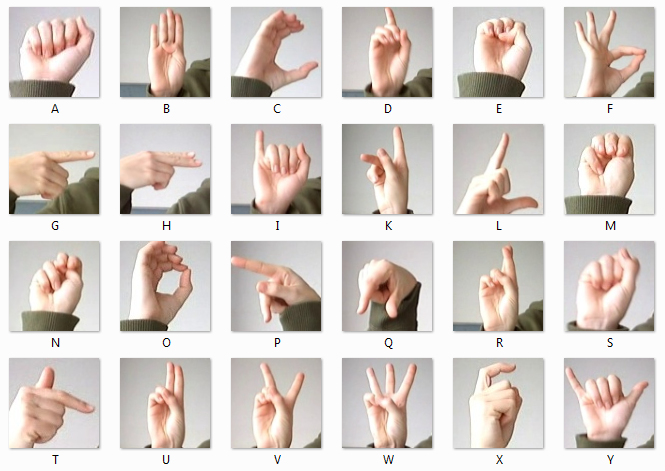

In [1]:
from IPython.display import Image
Image("../input/amer_sign2.png")

# About the data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

Load the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../input/sign_mnist_train.csv')
test = pd.read_csv('../input/sign_mnist_test.csv')

In [4]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0     153    ...          207       207       207       207       206   
1     158    ...           69       149       128        87        94   
2     187    ...          202       201       200       199       198   
3     210    ...          235       234       233       231       230   
4     185    ...           92       105       105       108       133   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0       206       206       204       203       202  
1       163       175       103       135       149  
2       199       198       195       194       195  
3       226       225       222       229       163  
4       163       157       163       164       179  

[5 rows x 785 columns]

In [5]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Let's see what does each sign means

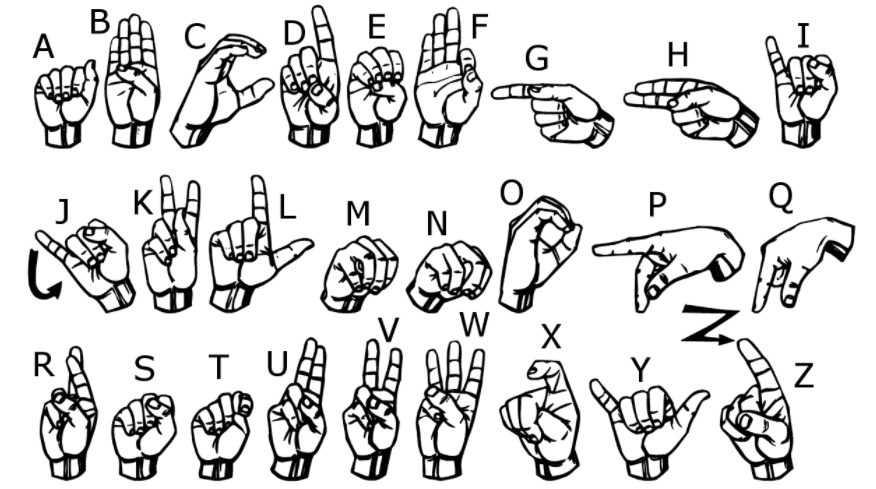

In [6]:
Image("../input/american_sign_language.PNG")

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

In [7]:
labels = train['label'].values

In [8]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

# Data exploration

In [9]:
train.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [10]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
#labels = label_binrizer.fit_transform(labels)

In [12]:
labels

array([ 3,  6,  2, ..., 18, 17, 23])

Lets see how the images look

In [13]:
import string



6 G


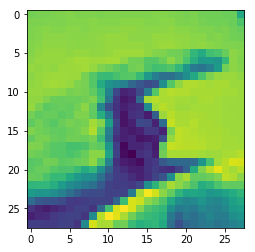

In [14]:
i = 33
print(labels[i], string.ascii_uppercase[labels[i]])
plt.imshow(images[i].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

In [17]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

import matplotlib.pyplot as plt


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Creating the batch size to 128 and using 50 epochs

In [18]:
x_train[0].shape

(784,)

Normalizing the training and test data

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [21]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

16


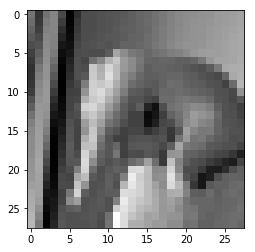

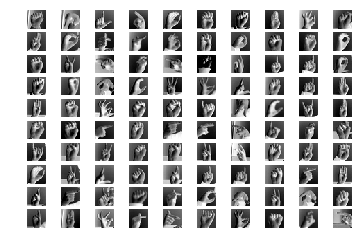

In [22]:
i=100

print(y_train[i])

plt.imshow(np.squeeze(x_train[i]), cmap='gray')
plt.show()

for i in range(100):
	# define subplot
	plt.subplot(10, 10, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(np.squeeze(x_train[i]), cmap='gray_r')
plt.show()

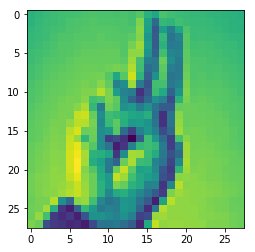

In [23]:
plt.imshow(x_train[10].reshape(28,28))

[](http://)# Discriminator

In [24]:

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model


In [25]:
# define the standalone generator model
def define_generator(latent_dim, n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

In [26]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [27]:
# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = ((x_train, y_train,), ( x_test, y_test))
	# expand to 3d, e.g. add channels
	#X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5/255) / (127.5/255)
	return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y


In [28]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y



Epoch:  0 6 G


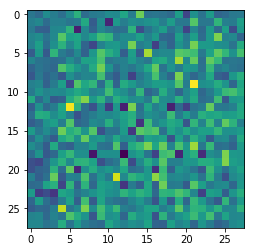

Epoch:  0 0 A


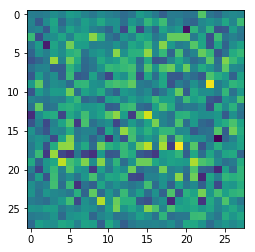

Epoch:  0 8 I


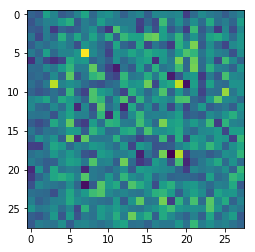

Epoch:  0 3 D


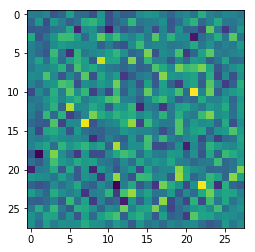

Epoch:  0 4 E


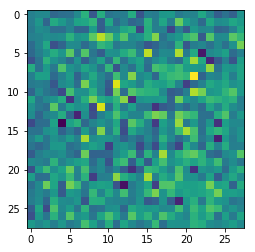

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


>1, 150/150, d1=0.474, d2=0.372 g=1.375
Epoch:  1 8 I


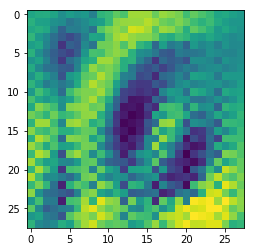

Epoch:  1 2 C


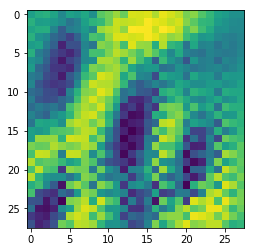

Epoch:  1 4 E


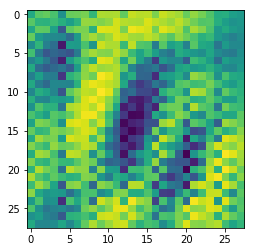

Epoch:  1 1 B


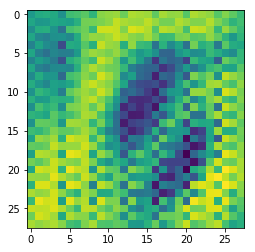

Epoch:  1 2 C


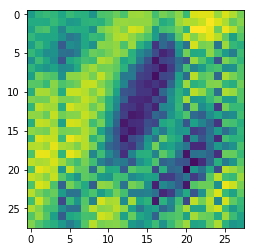

>2, 150/150, d1=0.479, d2=0.315 g=1.441
Epoch:  2 2 C


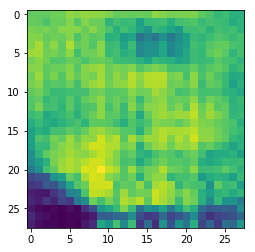

Epoch:  2 5 F


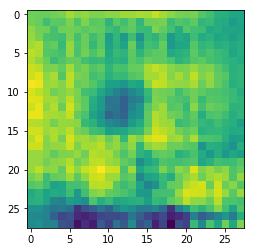

Epoch:  2 3 D


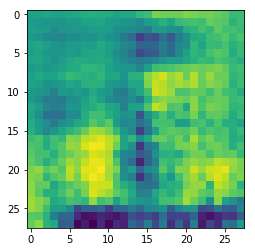

Epoch:  2 6 G


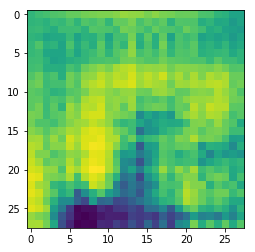

Epoch:  2 6 G


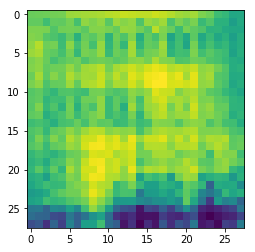

>3, 150/150, d1=0.452, d2=0.295 g=1.525
Epoch:  3 1 B


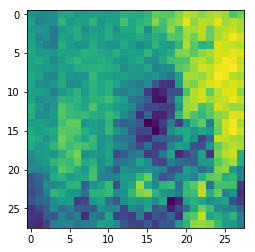

Epoch:  3 6 G


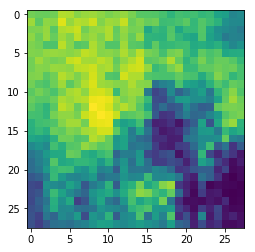

Epoch:  3 6 G


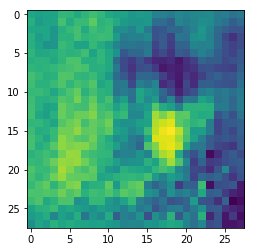

Epoch:  3 5 F


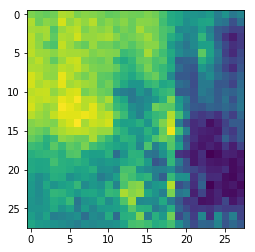

Epoch:  3 4 E


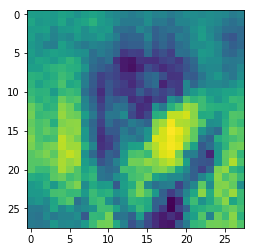

>4, 150/150, d1=0.487, d2=0.317 g=1.572
Epoch:  4 5 F


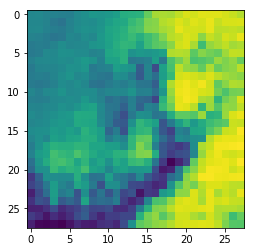

Epoch:  4 3 D


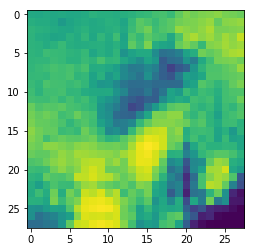

Epoch:  4 0 A


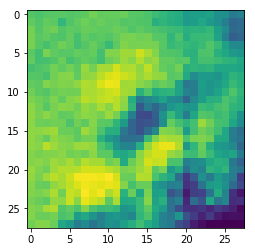

Epoch:  4 7 H


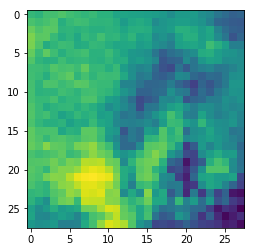

Epoch:  4 6 G


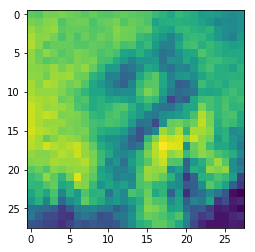

>5, 150/150, d1=0.552, d2=0.335 g=1.660
Epoch:  5 3 D


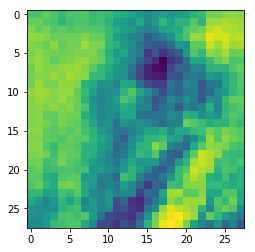

Epoch:  5 4 E


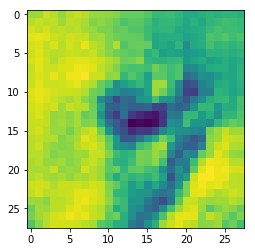

Epoch:  5 2 C


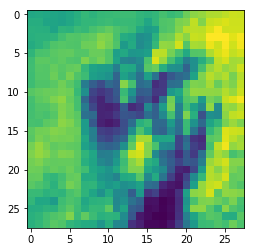

Epoch:  5 6 G


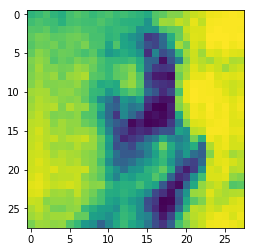

Epoch:  5 0 A


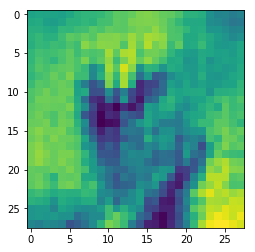

>6, 150/150, d1=0.430, d2=0.307 g=1.630
Epoch:  6 0 A


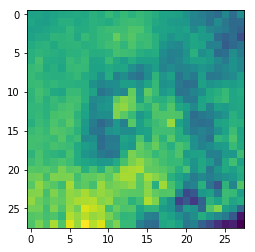

Epoch:  6 5 F


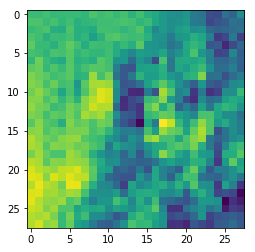

Epoch:  6 1 B


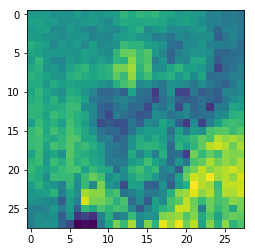

Epoch:  6 7 H


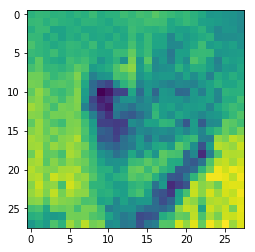

Epoch:  6 4 E


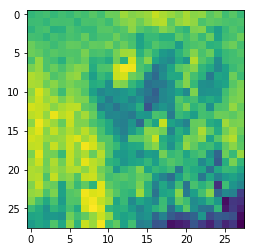

>7, 150/150, d1=0.498, d2=0.293 g=1.784
Epoch:  7 9 J


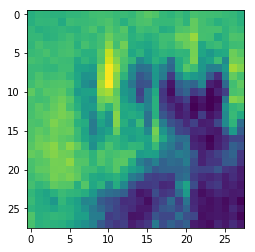

Epoch:  7 9 J


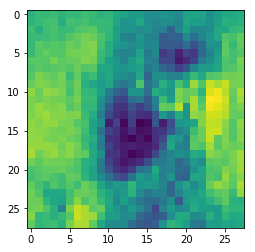

Epoch:  7 7 H


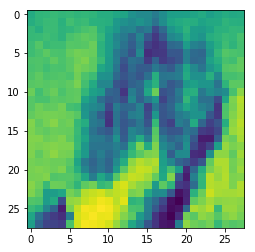

Epoch:  7 4 E


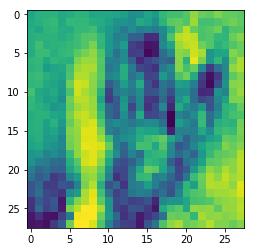

Epoch:  7 3 D


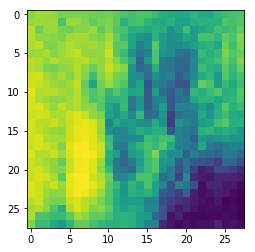

>8, 150/150, d1=0.527, d2=0.344 g=1.746
Epoch:  8 6 G


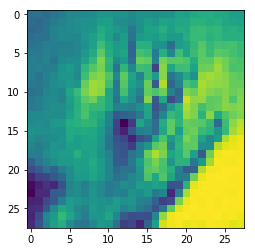

Epoch:  8 4 E


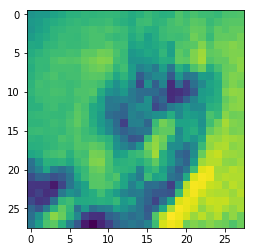

Epoch:  8 8 I


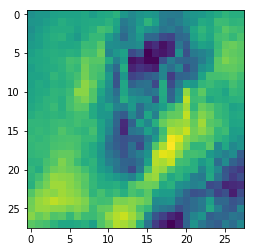

Epoch:  8 5 F


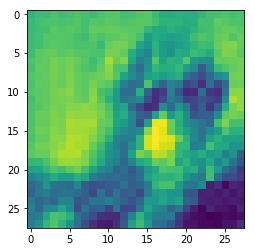

Epoch:  8 4 E


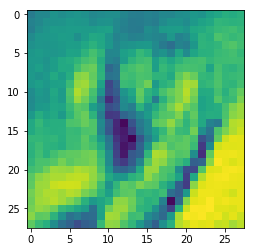

>9, 150/150, d1=0.494, d2=0.325 g=1.862
Epoch:  9 6 G


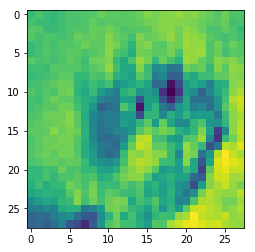

Epoch:  9 5 F


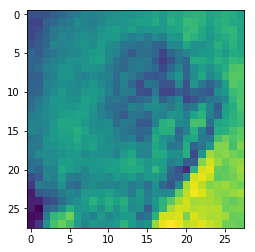

Epoch:  9 6 G


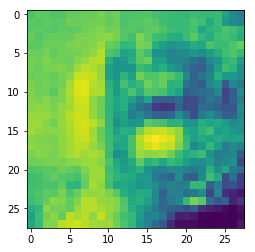

Epoch:  9 8 I


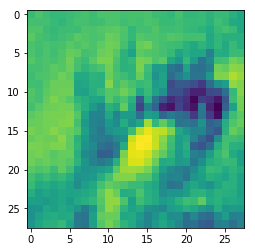

Epoch:  9 7 H


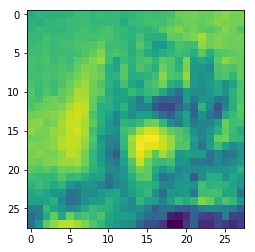

>10, 150/150, d1=0.459, d2=0.292 g=1.641
Epoch:  10 3 D


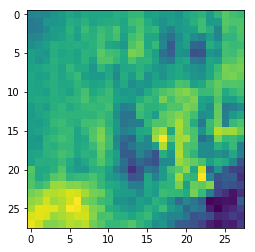

Epoch:  10 9 J


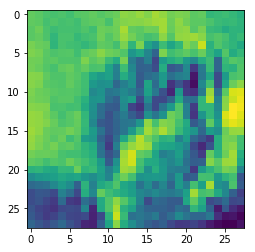

Epoch:  10 8 I


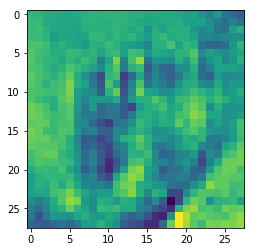

Epoch:  10 6 G


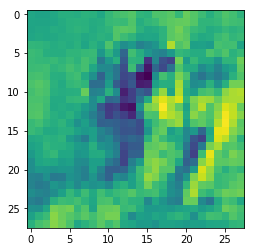

Epoch:  10 6 G


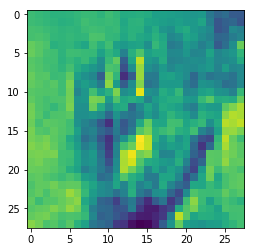

>11, 150/150, d1=0.440, d2=0.306 g=1.603
Epoch:  11 8 I


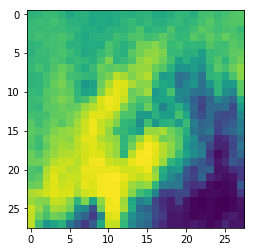

Epoch:  11 3 D


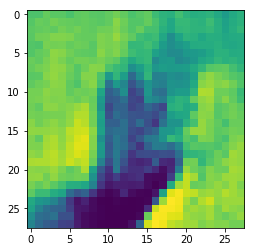

Epoch:  11 2 C


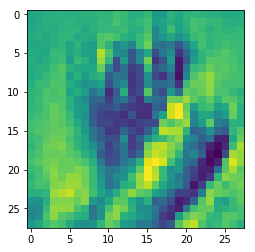

Epoch:  11 8 I


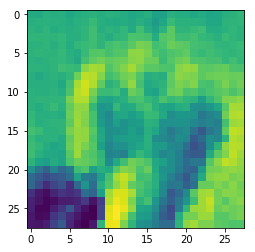

Epoch:  11 5 F


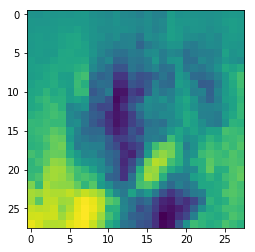

>12, 150/150, d1=0.505, d2=0.315 g=1.658
Epoch:  12 6 G


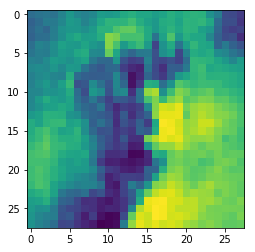

Epoch:  12 3 D


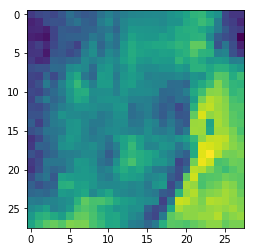

Epoch:  12 6 G


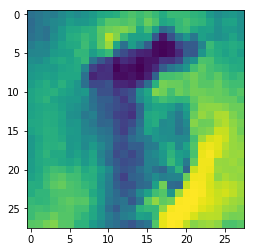

Epoch:  12 2 C


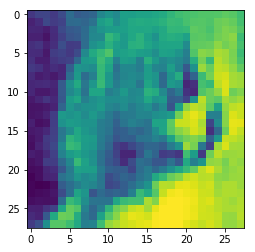

Epoch:  12 2 C


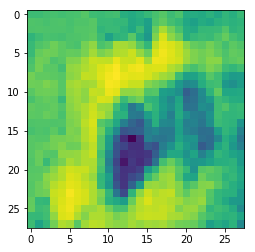

>13, 150/150, d1=0.509, d2=0.311 g=1.934
Epoch:  13 2 C


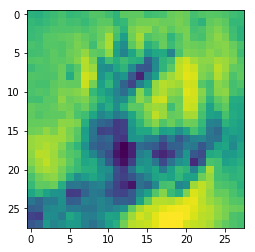

Epoch:  13 8 I


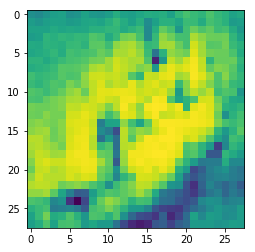

Epoch:  13 5 F


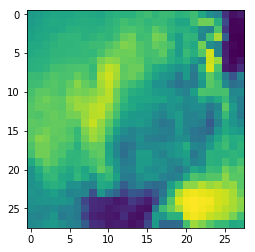

Epoch:  13 9 J


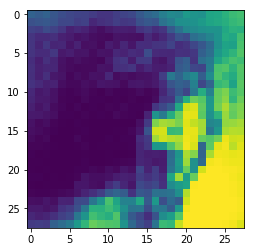

Epoch:  13 9 J


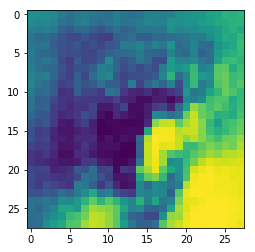

>14, 150/150, d1=0.336, d2=0.315 g=1.799
Epoch:  14 7 H


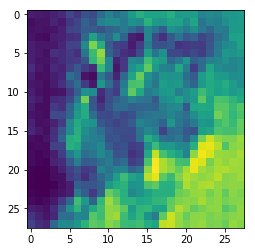

Epoch:  14 0 A


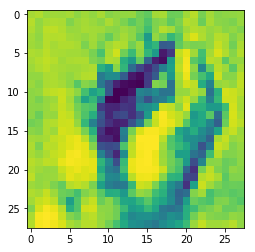

Epoch:  14 7 H


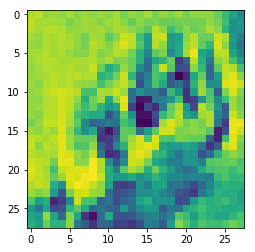

Epoch:  14 0 A


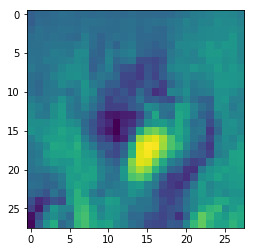

Epoch:  14 2 C


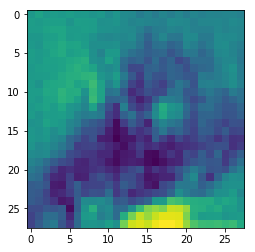

>15, 150/150, d1=0.430, d2=0.310 g=1.835
Epoch:  15 7 H


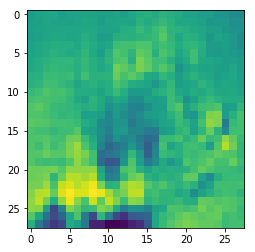

Epoch:  15 4 E


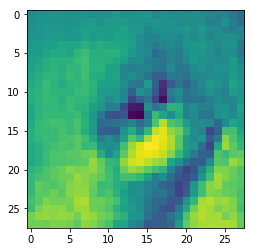

Epoch:  15 2 C


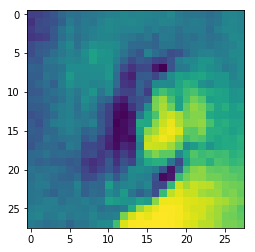

Epoch:  15 5 F


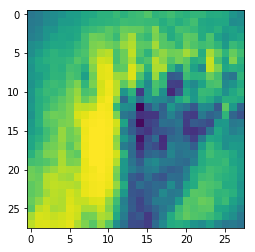

Epoch:  15 2 C


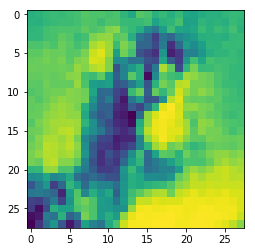

>16, 150/150, d1=0.490, d2=0.280 g=1.671
Epoch:  16 4 E


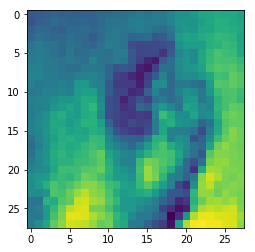

Epoch:  16 8 I


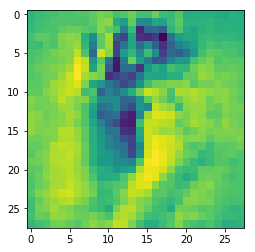

Epoch:  16 5 F


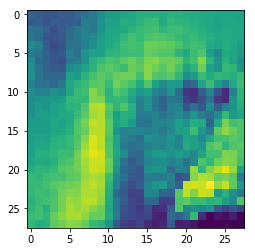

Epoch:  16 1 B


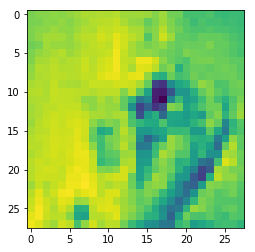

Epoch:  16 3 D


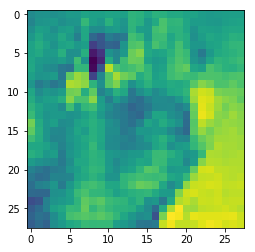

>17, 150/150, d1=0.437, d2=0.286 g=2.104
Epoch:  17 5 F


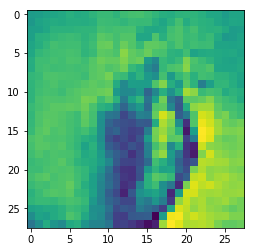

Epoch:  17 4 E


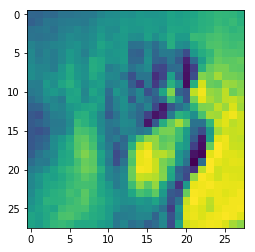

Epoch:  17 4 E


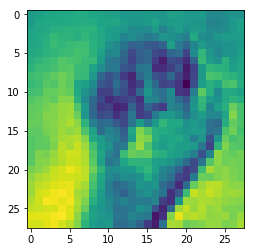

Epoch:  17 5 F


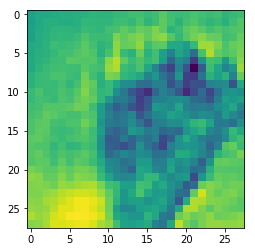

Epoch:  17 3 D


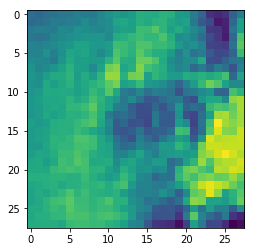

>18, 150/150, d1=0.469, d2=0.290 g=1.765
Epoch:  18 9 J


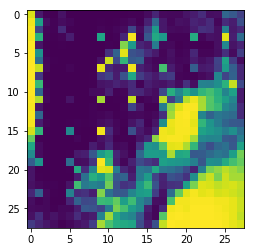

Epoch:  18 2 C


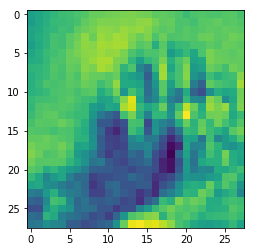

Epoch:  18 7 H


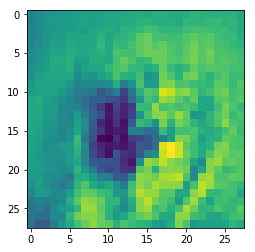

Epoch:  18 3 D


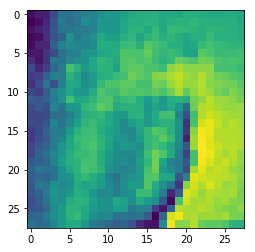

Epoch:  18 6 G


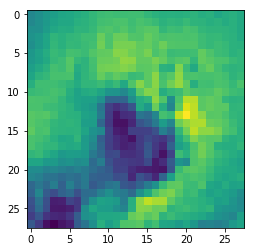

>19, 150/150, d1=0.396, d2=0.271 g=2.033
Epoch:  19 3 D


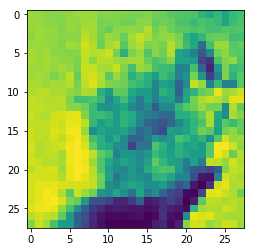

Epoch:  19 9 J


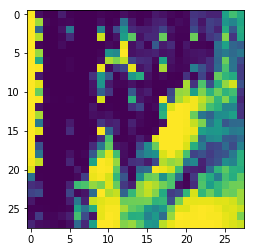

Epoch:  19 4 E


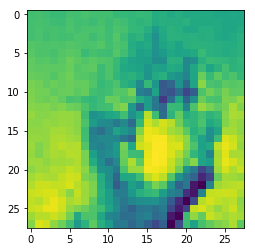

Epoch:  19 5 F


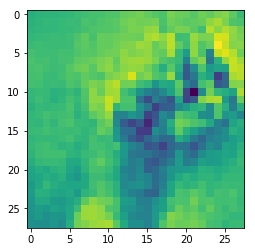

Epoch:  19 6 G


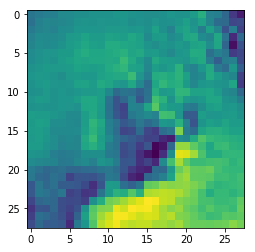

>20, 150/150, d1=0.400, d2=0.281 g=2.050
Epoch:  20 7 H


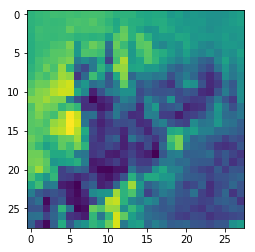

Epoch:  20 4 E


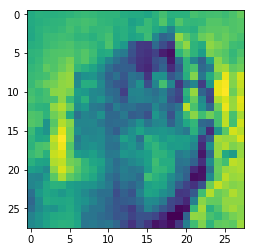

Epoch:  20 3 D


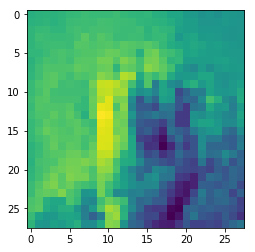

Epoch:  20 4 E


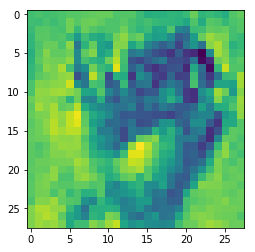

Epoch:  20 4 E


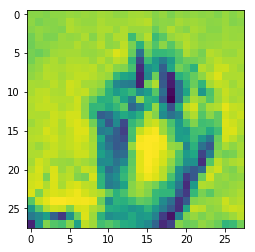

>21, 150/150, d1=0.330, d2=0.303 g=1.973
Epoch:  21 1 B


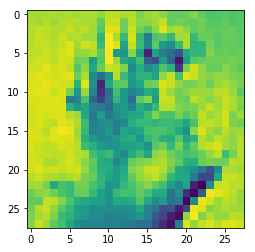

Epoch:  21 9 J


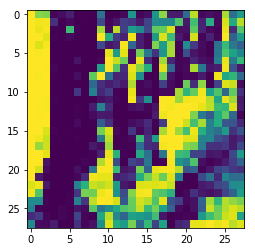

Epoch:  21 6 G


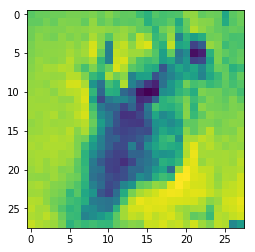

Epoch:  21 8 I


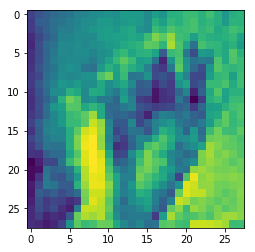

Epoch:  21 5 F


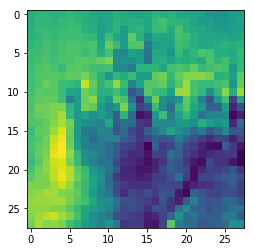

>22, 150/150, d1=0.290, d2=0.317 g=2.194
Epoch:  22 4 E


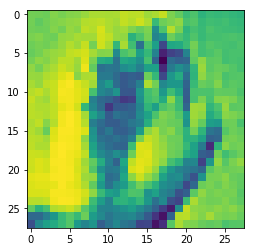

Epoch:  22 5 F


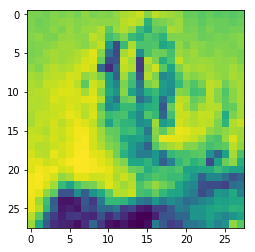

Epoch:  22 8 I


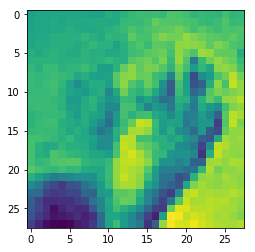

Epoch:  22 2 C


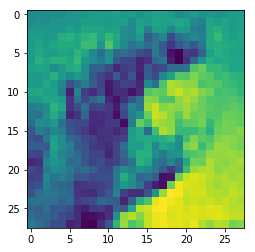

Epoch:  22 3 D


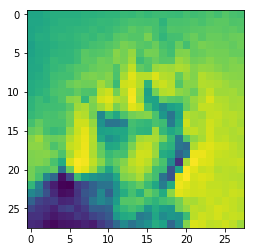

>23, 150/150, d1=0.472, d2=0.300 g=2.008
Epoch:  23 1 B


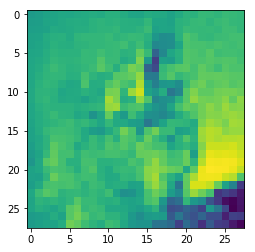

Epoch:  23 0 A


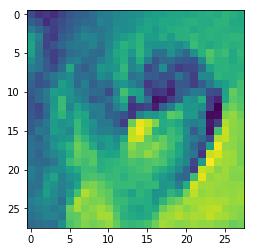

Epoch:  23 5 F


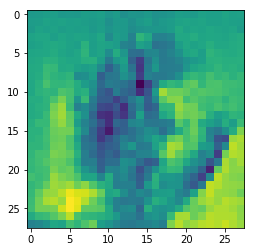

Epoch:  23 5 F


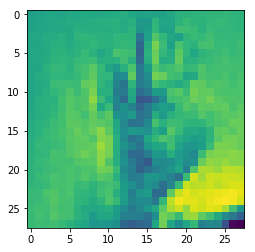

Epoch:  23 5 F


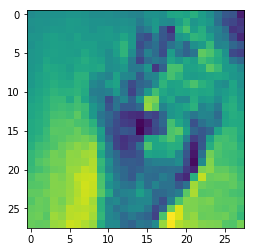

>24, 150/150, d1=0.372, d2=0.305 g=2.440
Epoch:  24 5 F


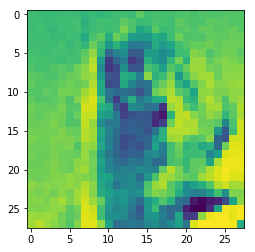

Epoch:  24 6 G


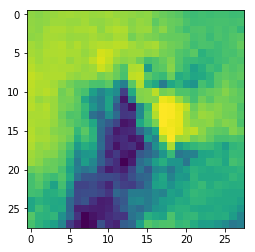

Epoch:  24 6 G


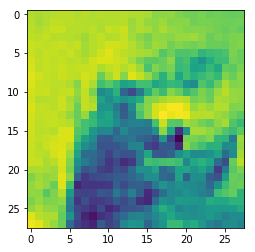

Epoch:  24 3 D


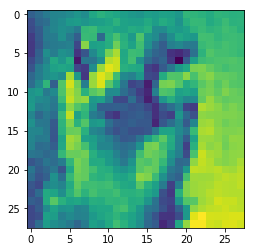

Epoch:  24 1 B


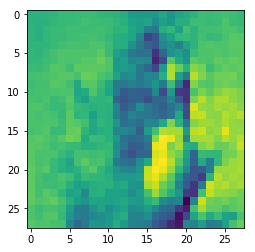

>25, 150/150, d1=0.472, d2=0.285 g=2.076
Epoch:  25 5 F


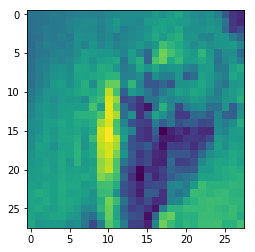

Epoch:  25 0 A


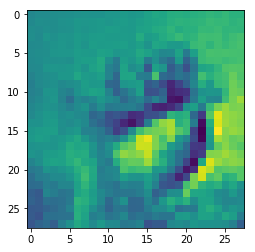

Epoch:  25 4 E


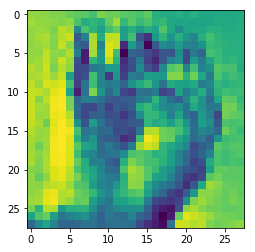

Epoch:  25 6 G


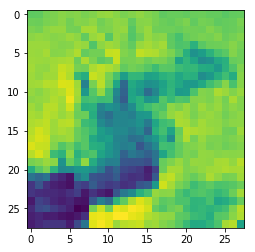

Epoch:  25 9 J


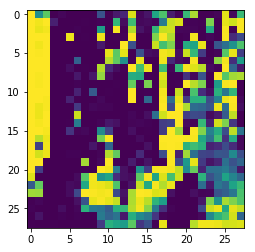

>26, 150/150, d1=0.378, d2=0.300 g=2.469
Epoch:  26 7 H


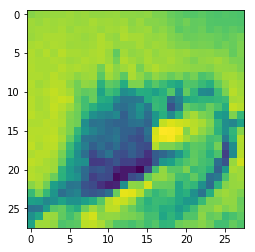

Epoch:  26 5 F


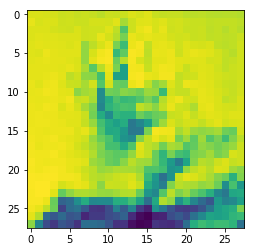

Epoch:  26 8 I


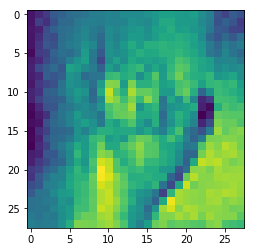

Epoch:  26 9 J


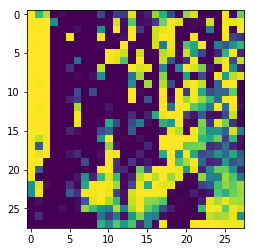

Epoch:  26 6 G


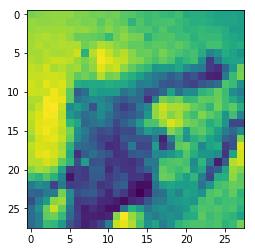

>27, 150/150, d1=0.591, d2=0.308 g=2.122
Epoch:  27 0 A


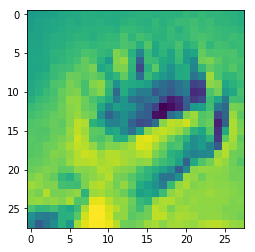

Epoch:  27 6 G


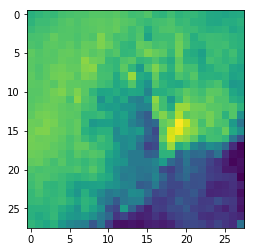

Epoch:  27 6 G


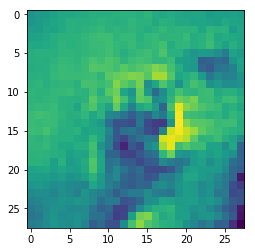

Epoch:  27 9 J


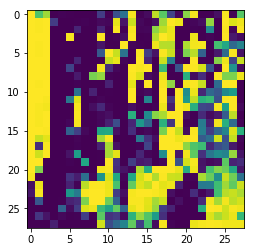

Epoch:  27 8 I


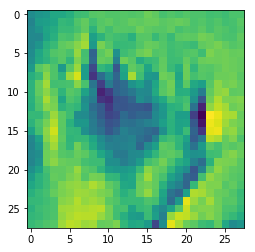

>28, 150/150, d1=0.401, d2=0.276 g=2.033
Epoch:  28 0 A


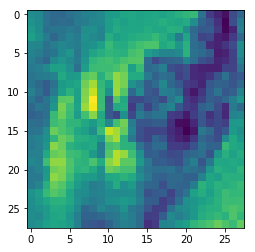

Epoch:  28 0 A


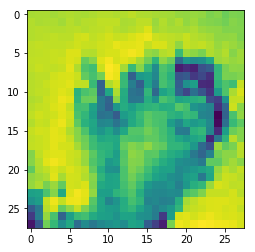

Epoch:  28 6 G


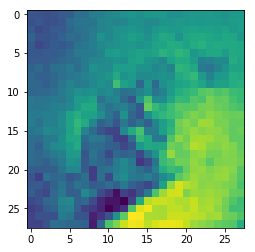

Epoch:  28 1 B


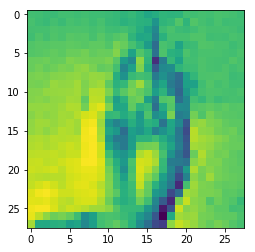

Epoch:  28 2 C


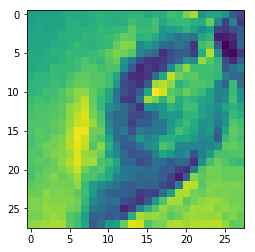

>29, 150/150, d1=0.523, d2=0.316 g=2.517
Epoch:  29 7 H


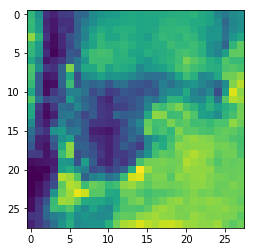

Epoch:  29 8 I


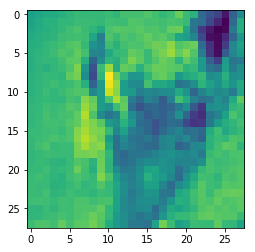

Epoch:  29 0 A


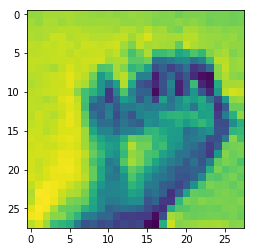

Epoch:  29 7 H


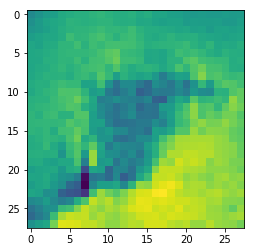

Epoch:  29 6 G


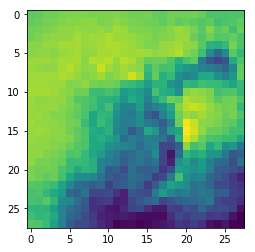

>30, 150/150, d1=0.334, d2=0.285 g=2.467
Epoch:  30 7 H


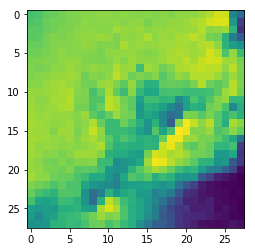

Epoch:  30 5 F


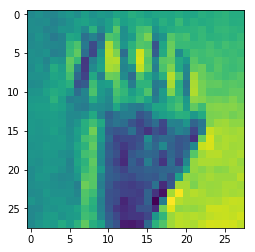

Epoch:  30 1 B


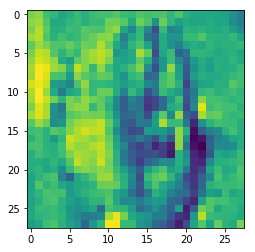

Epoch:  30 2 C


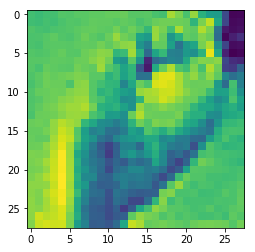

Epoch:  30 3 D


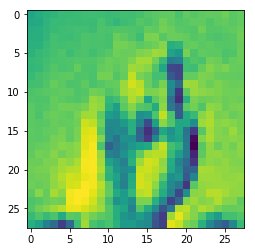

>31, 150/150, d1=0.414, d2=0.319 g=2.138
Epoch:  31 1 B


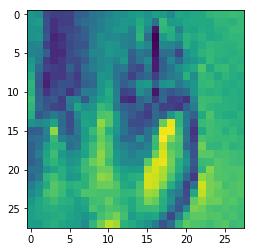

Epoch:  31 8 I


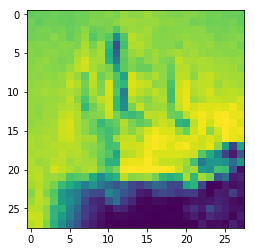

Epoch:  31 2 C


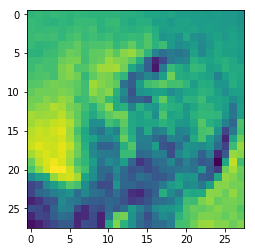

Epoch:  31 5 F


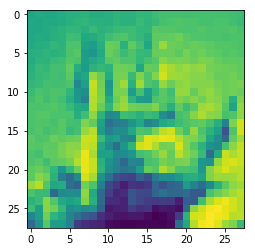

Epoch:  31 1 B


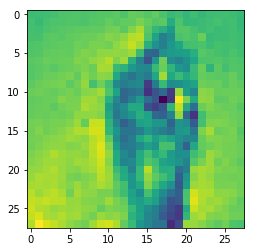

>32, 150/150, d1=0.442, d2=0.333 g=1.731
Epoch:  32 5 F


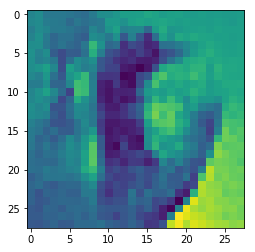

Epoch:  32 8 I


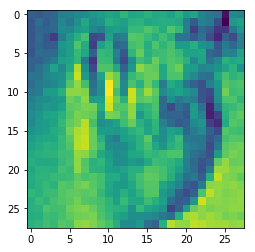

Epoch:  32 4 E


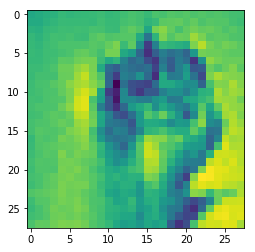

Epoch:  32 2 C


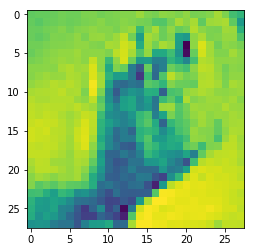

Epoch:  32 2 C


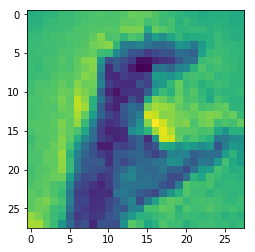

>33, 150/150, d1=0.394, d2=0.290 g=1.704
Epoch:  33 7 H


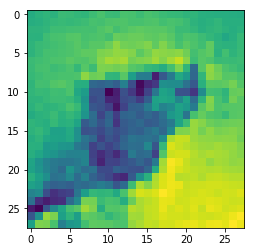

Epoch:  33 9 J


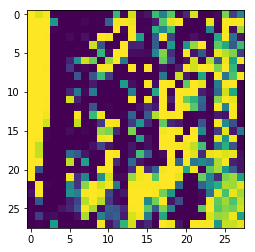

Epoch:  33 5 F


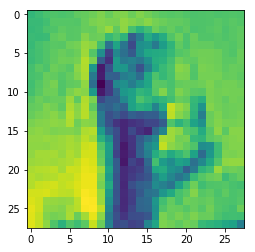

Epoch:  33 1 B


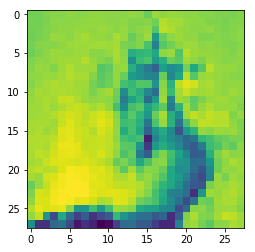

Epoch:  33 2 C


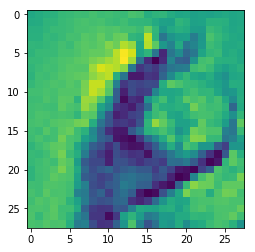

>34, 150/150, d1=0.410, d2=0.283 g=2.405
Epoch:  34 3 D


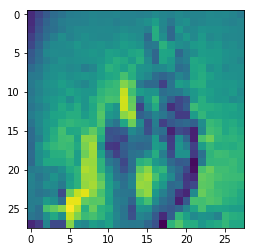

Epoch:  34 3 D


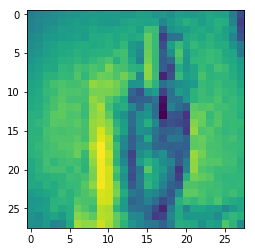

Epoch:  34 6 G


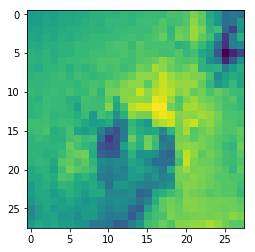

Epoch:  34 9 J


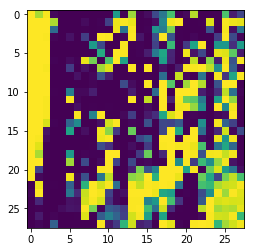

Epoch:  34 6 G


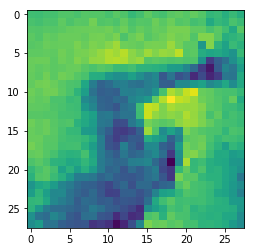

>35, 150/150, d1=0.427, d2=0.313 g=2.544
Epoch:  35 1 B


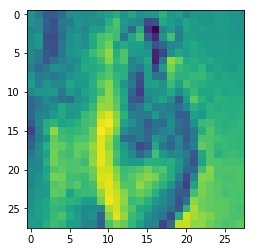

Epoch:  35 3 D


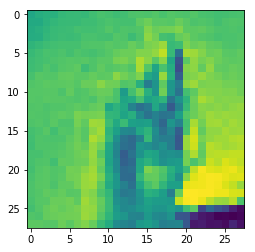

Epoch:  35 1 B


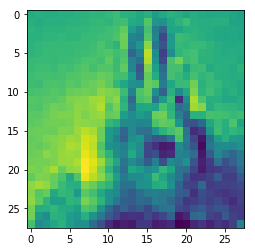

Epoch:  35 8 I


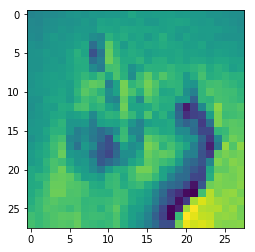

Epoch:  35 5 F


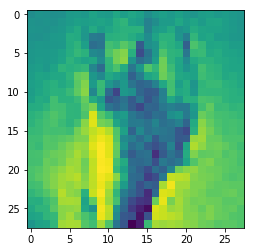

>36, 150/150, d1=0.462, d2=0.289 g=2.033
Epoch:  36 8 I


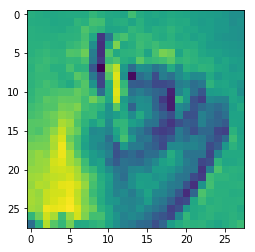

Epoch:  36 9 J


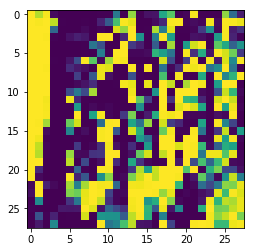

Epoch:  36 6 G


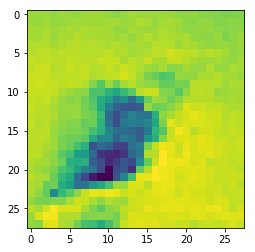

Epoch:  36 9 J


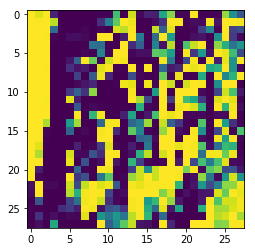

Epoch:  36 1 B


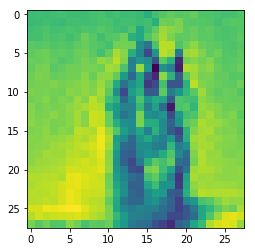

>37, 150/150, d1=0.359, d2=0.296 g=2.167
Epoch:  37 9 J


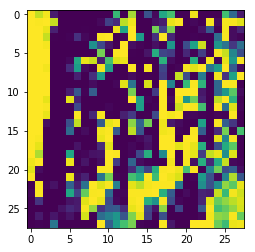

Epoch:  37 8 I


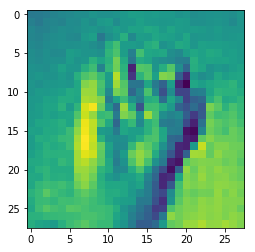

Epoch:  37 4 E


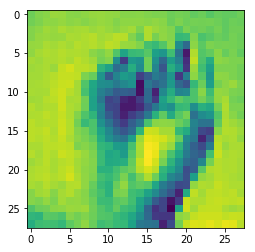

Epoch:  37 7 H


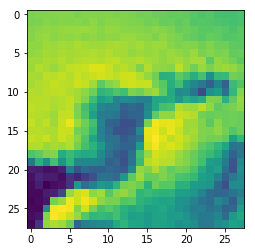

Epoch:  37 6 G


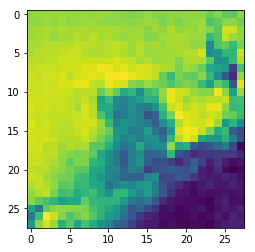

>38, 150/150, d1=0.518, d2=0.304 g=2.110
Epoch:  38 8 I


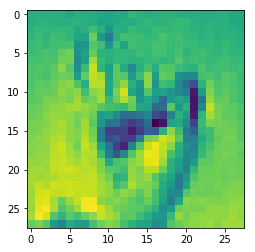

Epoch:  38 5 F


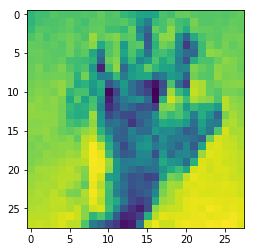

Epoch:  38 8 I


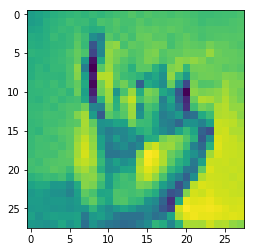

Epoch:  38 4 E


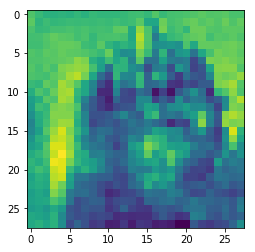

Epoch:  38 7 H


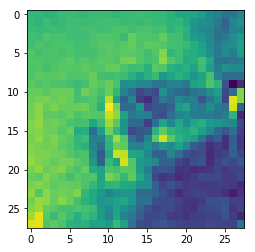

>39, 150/150, d1=0.429, d2=0.312 g=2.255
Epoch:  39 8 I


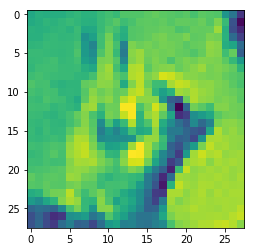

Epoch:  39 8 I


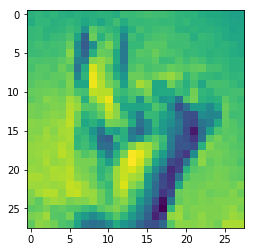

Epoch:  39 7 H


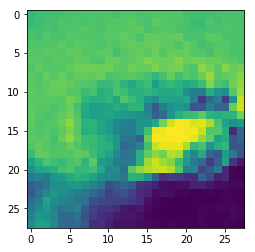

Epoch:  39 3 D


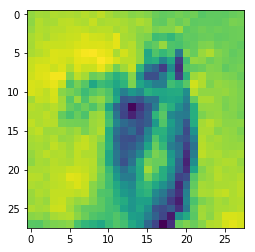

Epoch:  39 9 J


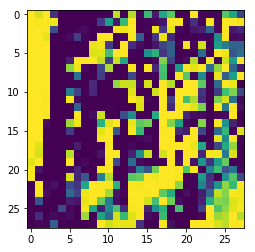

>40, 150/150, d1=0.530, d2=0.329 g=2.357
Epoch:  40 0 A


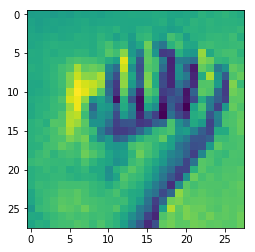

Epoch:  40 2 C


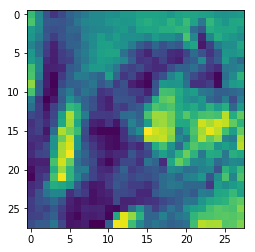

Epoch:  40 9 J


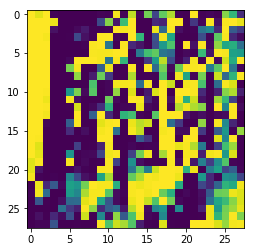

Epoch:  40 3 D


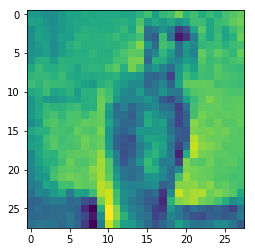

Epoch:  40 2 C


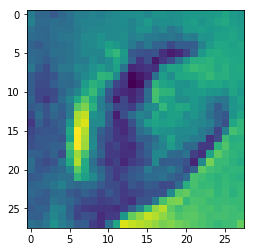

>41, 150/150, d1=0.442, d2=0.271 g=2.076
Epoch:  41 9 J


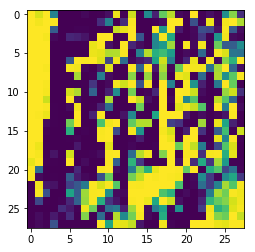

Epoch:  41 9 J


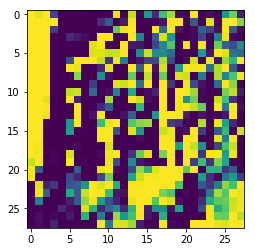

Epoch:  41 1 B


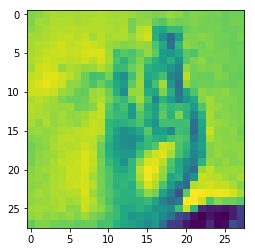

Epoch:  41 7 H


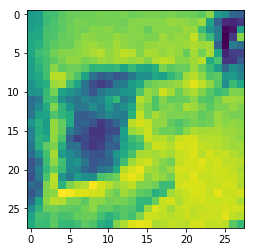

Epoch:  41 2 C


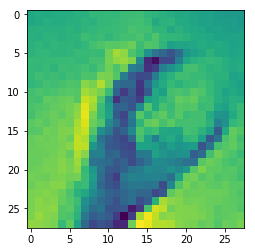

>42, 150/150, d1=0.591, d2=0.303 g=2.829
Epoch:  42 4 E


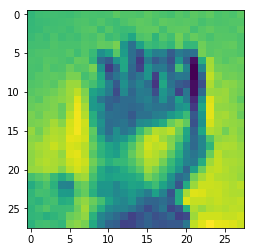

Epoch:  42 0 A


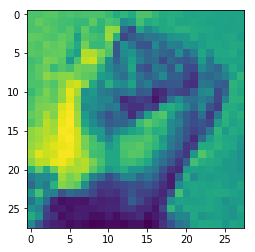

Epoch:  42 7 H


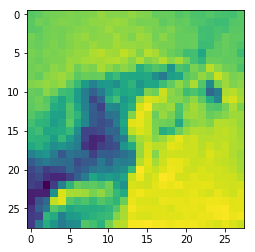

Epoch:  42 5 F


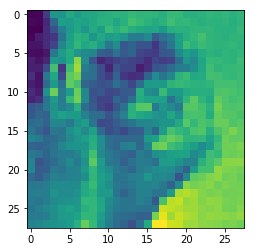

Epoch:  42 4 E


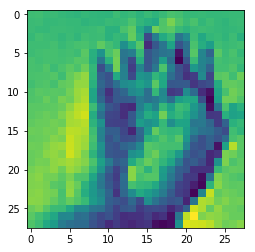

>43, 150/150, d1=0.496, d2=0.295 g=2.173
Epoch:  43 8 I


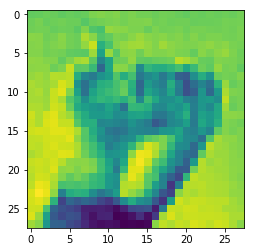

Epoch:  43 3 D


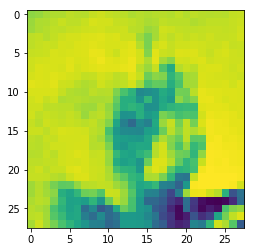

Epoch:  43 3 D


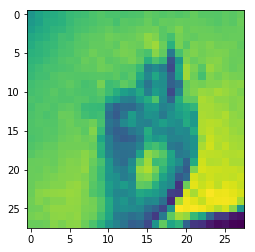

Epoch:  43 8 I


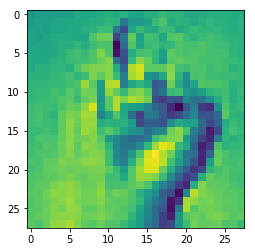

Epoch:  43 1 B


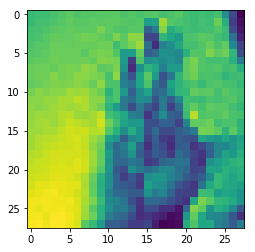

>44, 150/150, d1=0.476, d2=0.300 g=2.588
Epoch:  44 7 H


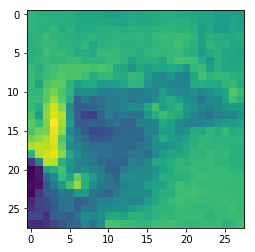

Epoch:  44 8 I


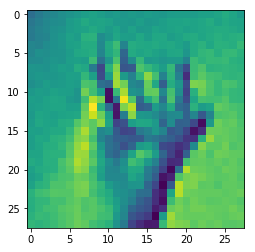

Epoch:  44 0 A


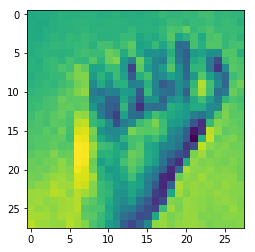

Epoch:  44 2 C


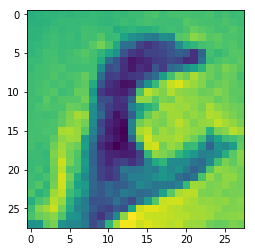

Epoch:  44 9 J


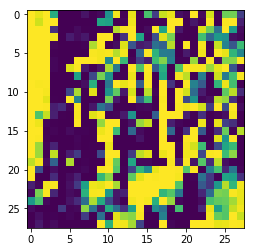

>45, 150/150, d1=0.391, d2=0.319 g=2.208
Epoch:  45 3 D


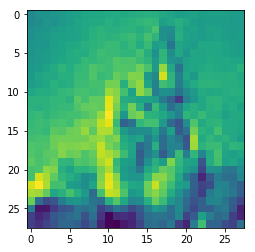

Epoch:  45 8 I


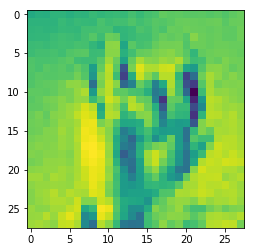

Epoch:  45 0 A


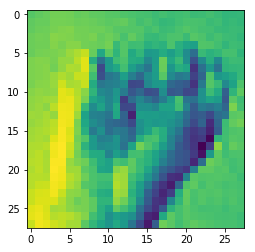

Epoch:  45 8 I


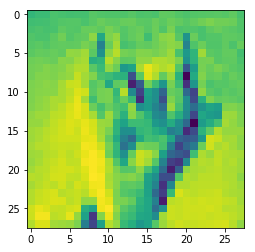

Epoch:  45 4 E


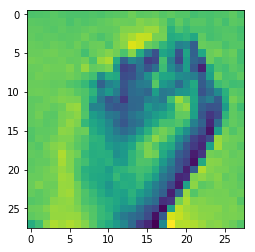

>46, 150/150, d1=0.432, d2=0.286 g=1.844
Epoch:  46 6 G


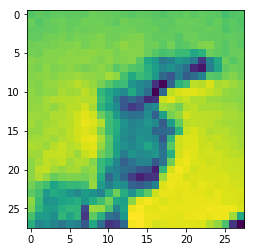

Epoch:  46 8 I


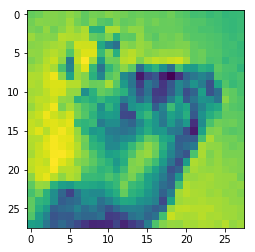

Epoch:  46 1 B


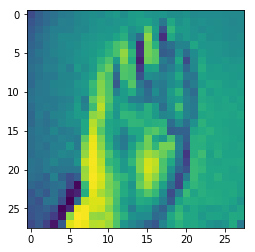

Epoch:  46 6 G


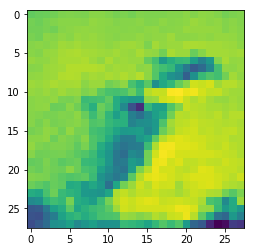

Epoch:  46 1 B


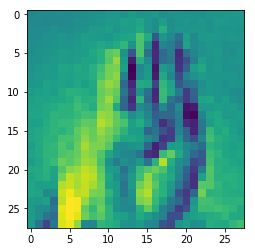

>47, 150/150, d1=0.477, d2=0.280 g=2.310
Epoch:  47 2 C


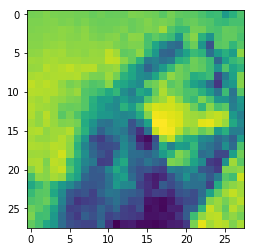

Epoch:  47 4 E


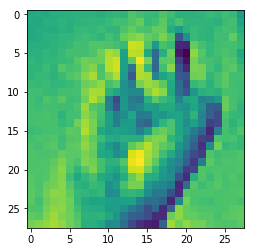

Epoch:  47 2 C


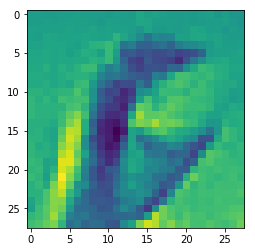

Epoch:  47 7 H


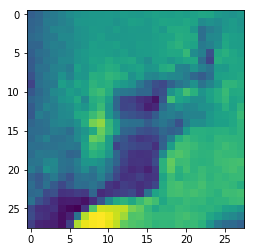

Epoch:  47 2 C


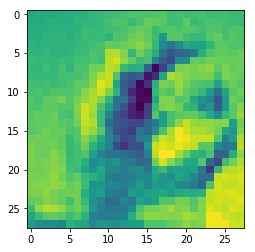

>48, 150/150, d1=0.424, d2=0.290 g=2.706
Epoch:  48 9 J


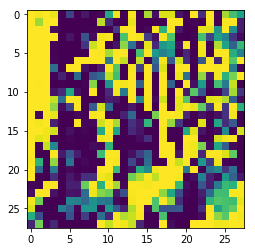

Epoch:  48 4 E


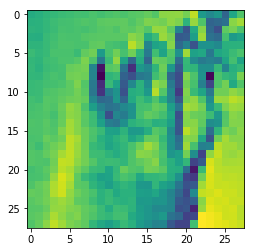

Epoch:  48 8 I


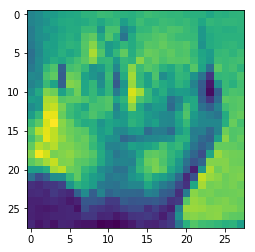

Epoch:  48 0 A


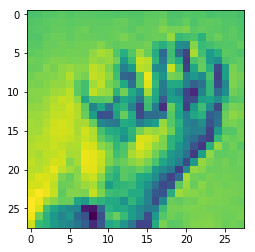

Epoch:  48 5 F


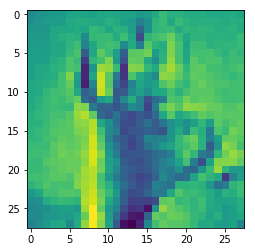

>49, 150/150, d1=0.389, d2=0.292 g=2.670
Epoch:  49 3 D


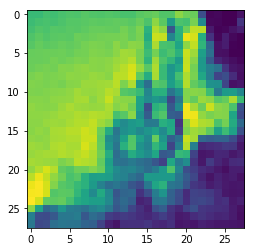

Epoch:  49 3 D


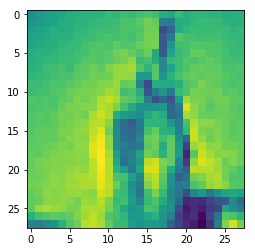

Epoch:  49 9 J


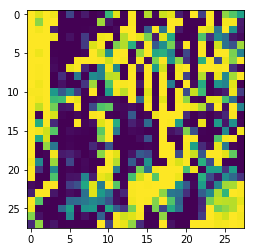

Epoch:  49 5 F


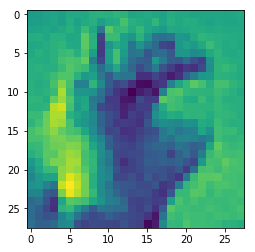

Epoch:  49 3 D


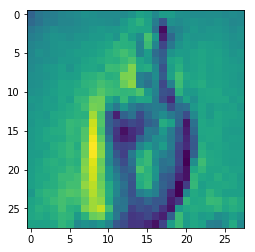

>50, 150/150, d1=0.333, d2=0.298 g=2.256
Epoch:  50 6 G


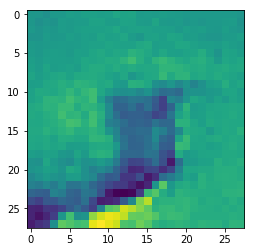

Epoch:  50 5 F


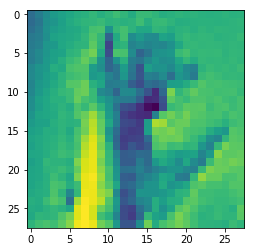

Epoch:  50 2 C


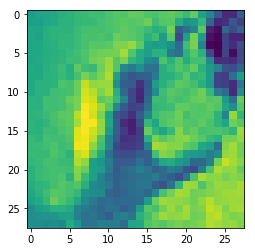

Epoch:  50 6 G


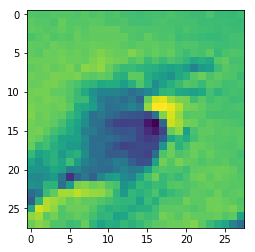

Epoch:  50 2 C


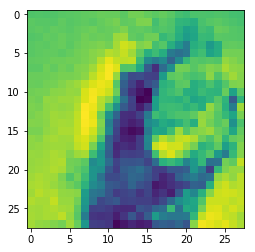

>51, 150/150, d1=0.346, d2=0.300 g=2.965
Epoch:  51 8 I


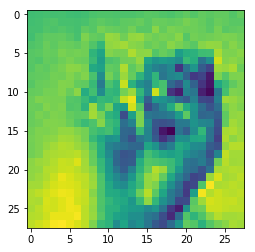

Epoch:  51 4 E


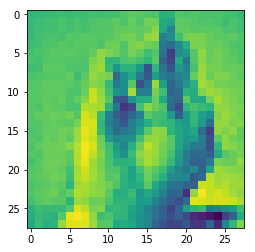

Epoch:  51 4 E


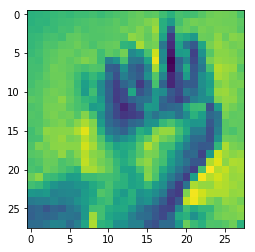

Epoch:  51 4 E


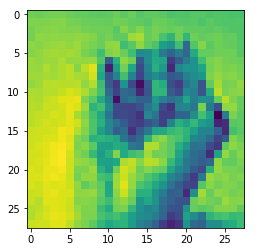

Epoch:  51 8 I


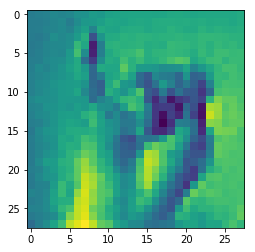

>52, 150/150, d1=0.390, d2=0.320 g=2.344
Epoch:  52 4 E


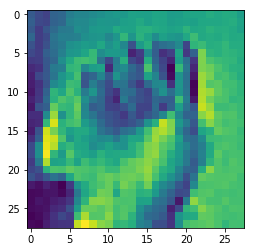

Epoch:  52 8 I


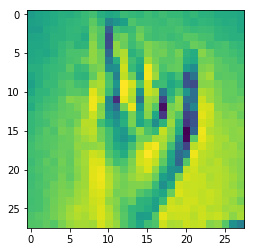

Epoch:  52 9 J


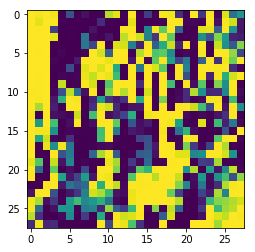

Epoch:  52 2 C


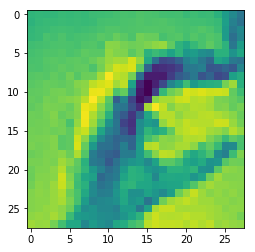

Epoch:  52 6 G


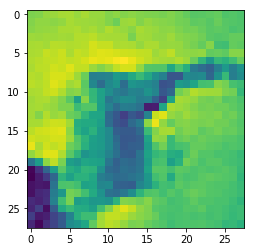

>53, 150/150, d1=0.435, d2=0.286 g=2.508
Epoch:  53 8 I


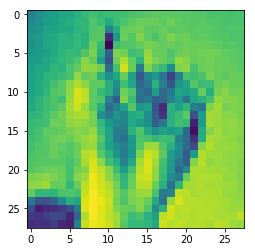

Epoch:  53 7 H


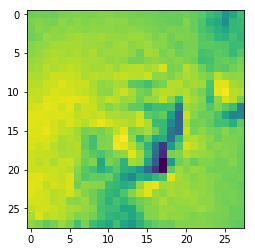

Epoch:  53 2 C


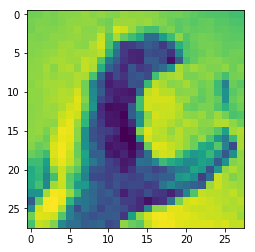

Epoch:  53 8 I


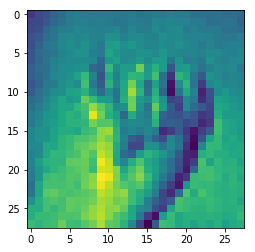

Epoch:  53 0 A


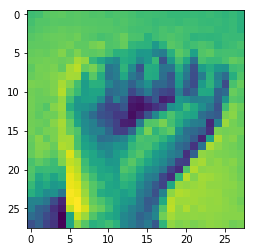

>54, 150/150, d1=0.438, d2=0.291 g=2.641
Epoch:  54 9 J


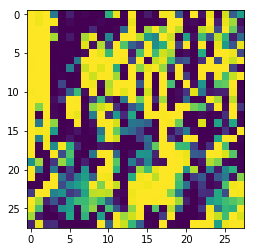

Epoch:  54 1 B


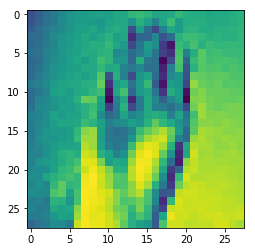

Epoch:  54 9 J


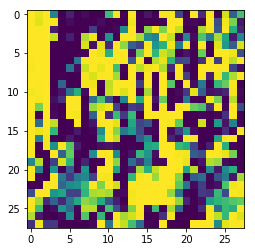

Epoch:  54 4 E


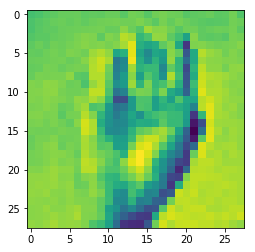

Epoch:  54 2 C


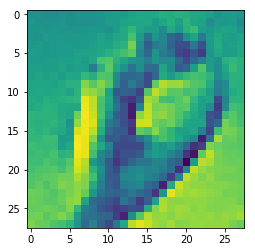

>55, 150/150, d1=0.402, d2=0.284 g=2.830
Epoch:  55 2 C


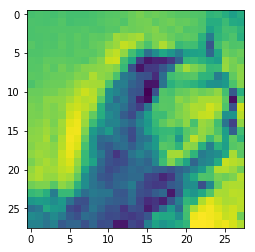

Epoch:  55 9 J


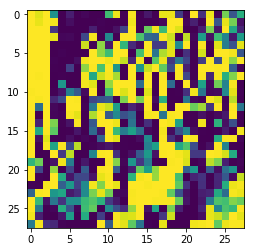

Epoch:  55 7 H


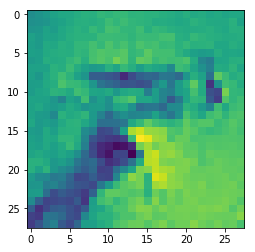

Epoch:  55 4 E


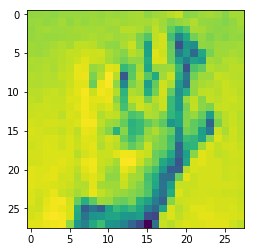

Epoch:  55 7 H


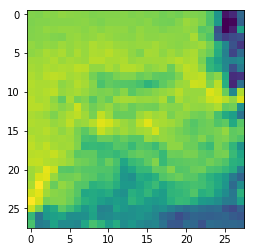

>56, 150/150, d1=0.393, d2=0.282 g=2.599
Epoch:  56 5 F


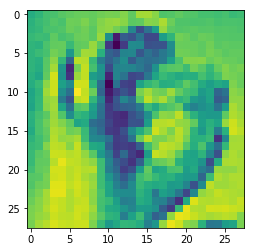

Epoch:  56 9 J


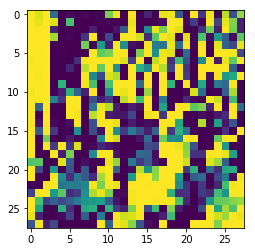

Epoch:  56 0 A


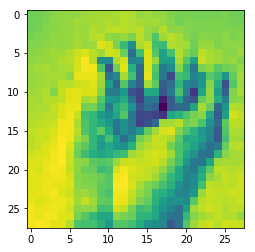

Epoch:  56 3 D


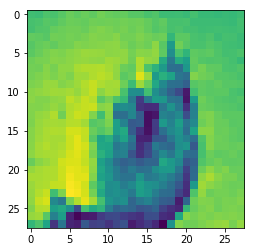

Epoch:  56 3 D


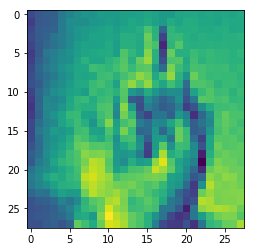

>57, 150/150, d1=0.288, d2=0.253 g=2.983
Epoch:  57 9 J


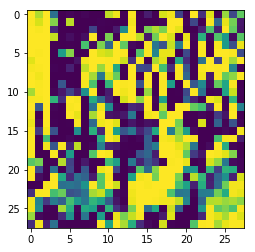

Epoch:  57 2 C


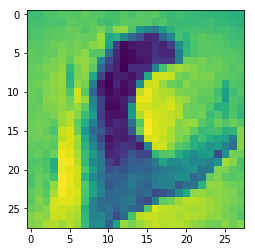

Epoch:  57 3 D


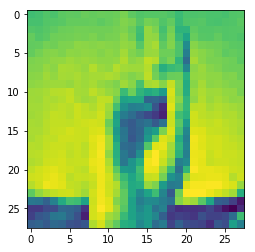

Epoch:  57 4 E


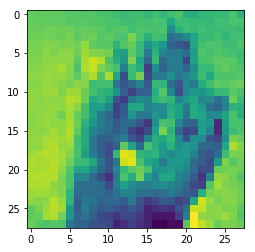

Epoch:  57 8 I


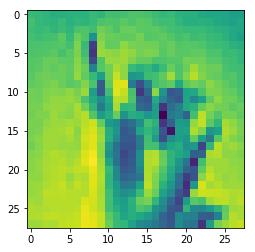

>58, 150/150, d1=0.479, d2=0.274 g=2.553
Epoch:  58 2 C


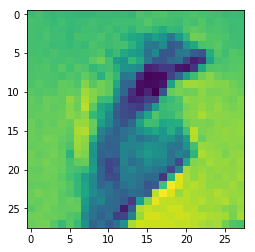

Epoch:  58 6 G


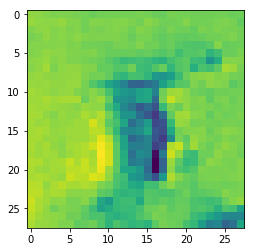

Epoch:  58 4 E


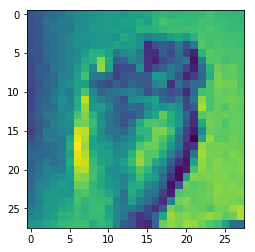

Epoch:  58 7 H


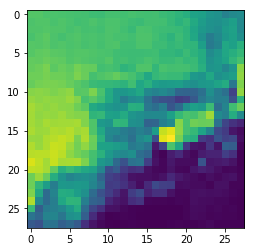

Epoch:  58 9 J


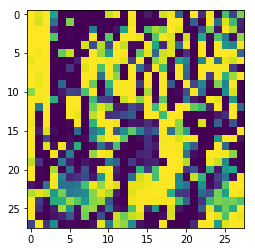

>59, 150/150, d1=0.383, d2=0.291 g=2.100
Epoch:  59 7 H


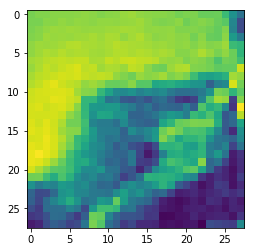

Epoch:  59 7 H


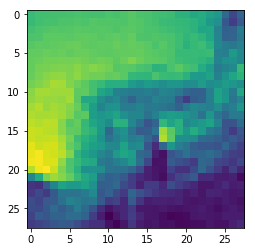

Epoch:  59 6 G


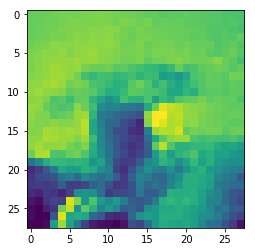

Epoch:  59 2 C


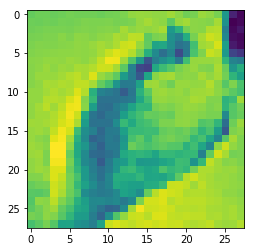

Epoch:  59 4 E


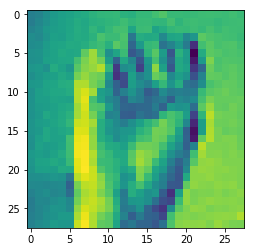

>60, 150/150, d1=0.501, d2=0.312 g=2.514
Epoch:  60 5 F


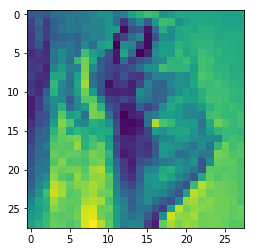

Epoch:  60 0 A


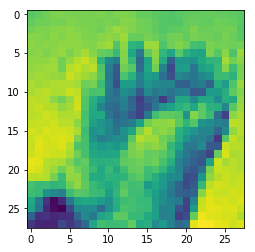

Epoch:  60 1 B


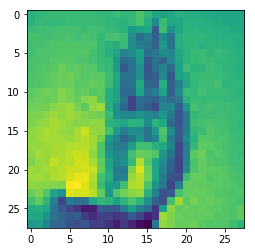

Epoch:  60 1 B


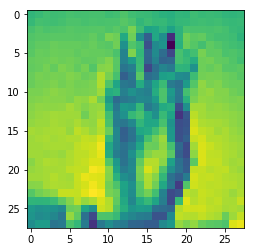

Epoch:  60 5 F


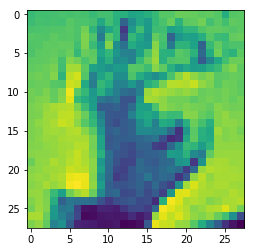

>61, 150/150, d1=0.371, d2=0.288 g=3.227
Epoch:  61 7 H


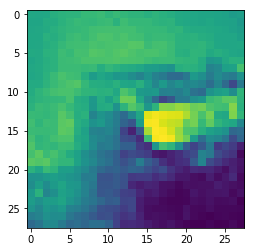

Epoch:  61 1 B


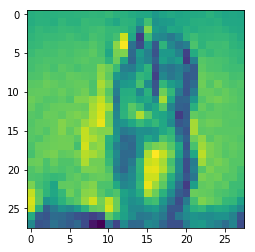

Epoch:  61 3 D


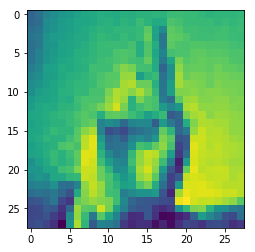

Epoch:  61 7 H


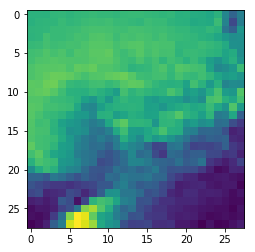

Epoch:  61 7 H


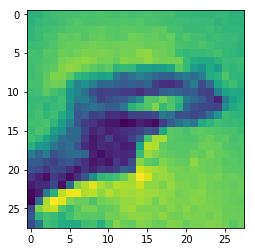

>62, 150/150, d1=0.525, d2=0.305 g=2.774
Epoch:  62 8 I


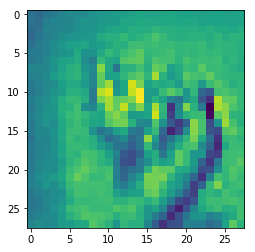

Epoch:  62 3 D


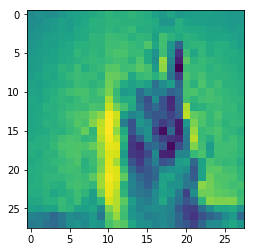

Epoch:  62 5 F


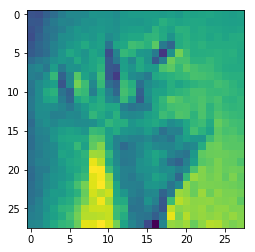

Epoch:  62 0 A


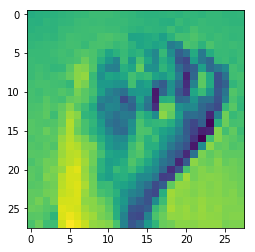

Epoch:  62 4 E


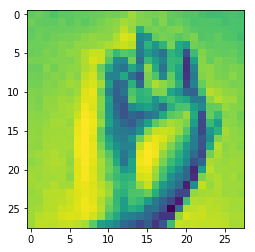

>63, 150/150, d1=0.388, d2=0.289 g=2.738
Epoch:  63 3 D


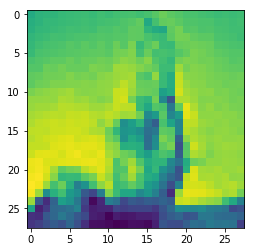

Epoch:  63 0 A


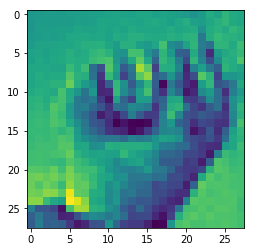

Epoch:  63 8 I


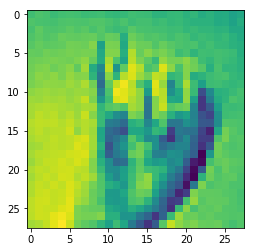

Epoch:  63 3 D


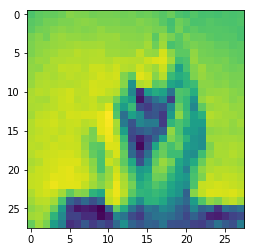

Epoch:  63 1 B


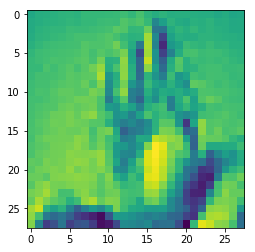

>64, 150/150, d1=0.362, d2=0.262 g=3.415
Epoch:  64 2 C


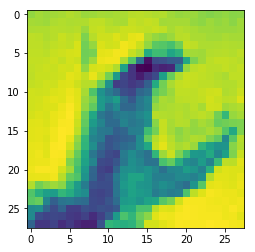

Epoch:  64 1 B


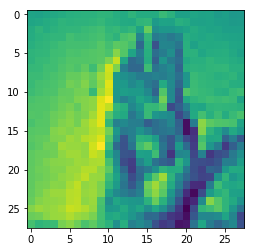

Epoch:  64 6 G


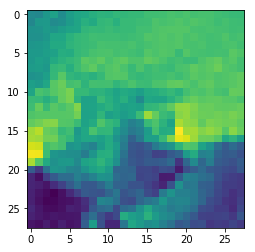

Epoch:  64 2 C


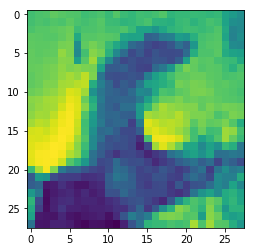

Epoch:  64 8 I


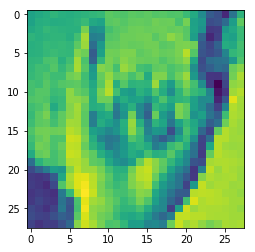

>65, 150/150, d1=0.475, d2=0.267 g=2.636
Epoch:  65 4 E


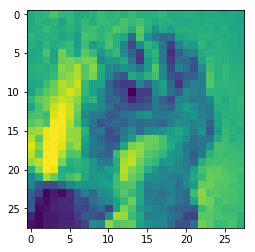

Epoch:  65 2 C


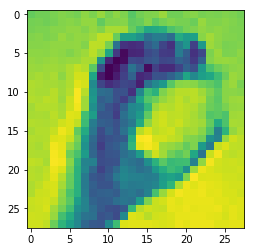

Epoch:  65 5 F


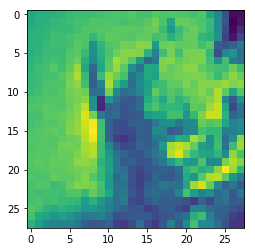

Epoch:  65 6 G


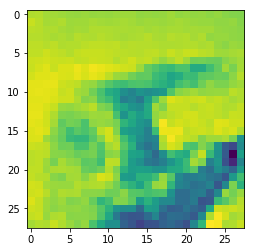

Epoch:  65 1 B


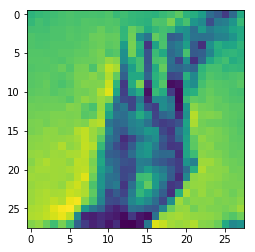

>66, 150/150, d1=0.515, d2=0.278 g=2.466
Epoch:  66 4 E


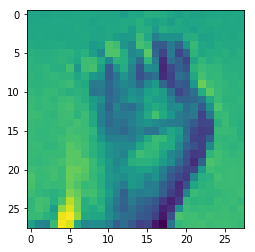

Epoch:  66 7 H


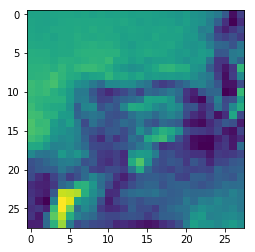

Epoch:  66 6 G


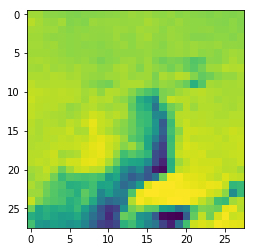

Epoch:  66 7 H


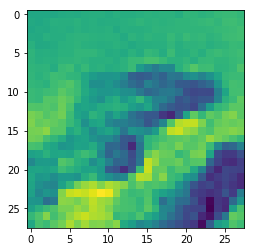

Epoch:  66 9 J


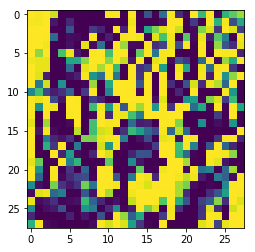

>67, 150/150, d1=0.459, d2=0.304 g=3.366
Epoch:  67 6 G


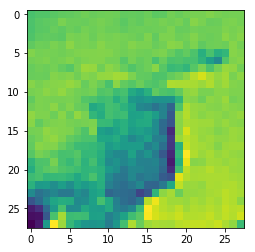

Epoch:  67 8 I


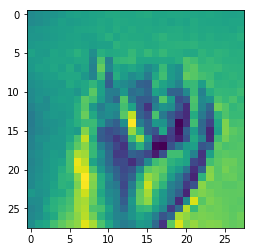

Epoch:  67 5 F


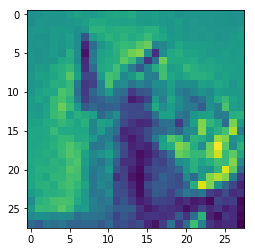

Epoch:  67 0 A


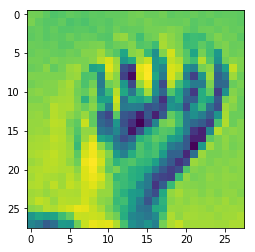

Epoch:  67 7 H


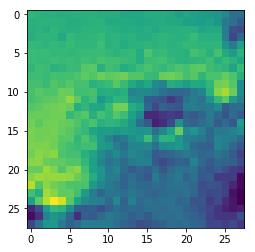

>68, 150/150, d1=0.552, d2=0.287 g=2.738
Epoch:  68 8 I


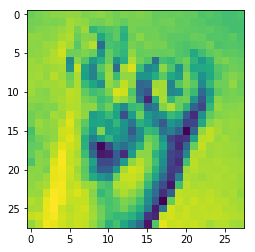

Epoch:  68 0 A


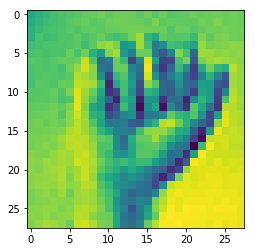

Epoch:  68 7 H


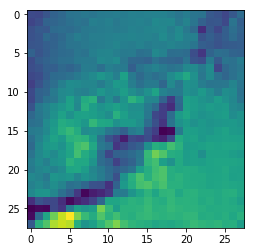

Epoch:  68 3 D


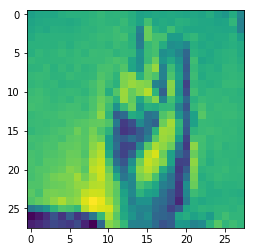

Epoch:  68 6 G


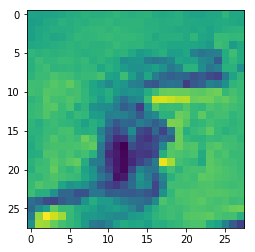

>69, 150/150, d1=0.379, d2=0.358 g=2.253
Epoch:  69 6 G


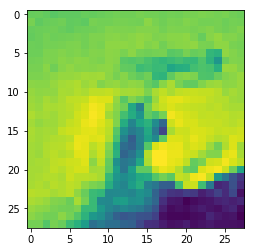

Epoch:  69 3 D


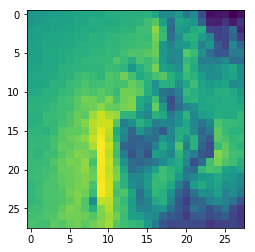

Epoch:  69 6 G


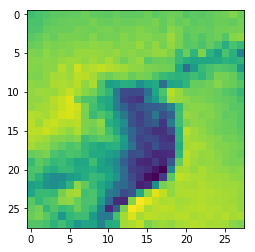

Epoch:  69 5 F


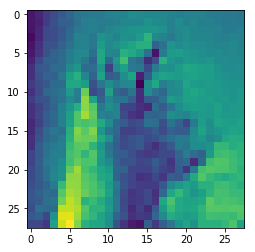

Epoch:  69 9 J


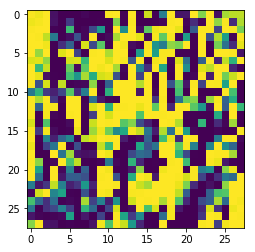

>70, 150/150, d1=0.439, d2=0.317 g=2.520
Epoch:  70 0 A


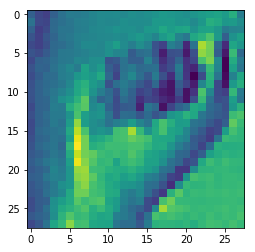

Epoch:  70 7 H


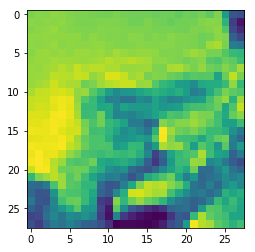

Epoch:  70 2 C


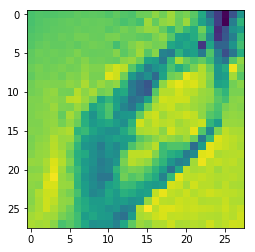

Epoch:  70 4 E


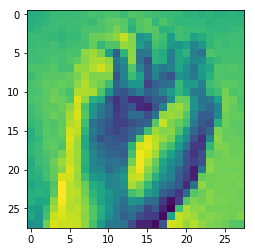

Epoch:  70 3 D


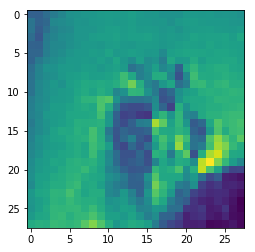

>71, 150/150, d1=0.415, d2=0.274 g=2.322
Epoch:  71 8 I


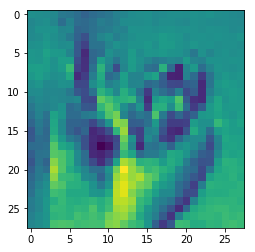

Epoch:  71 5 F


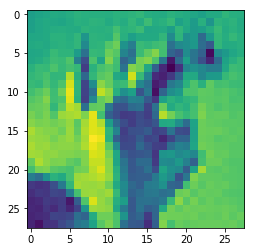

Epoch:  71 7 H


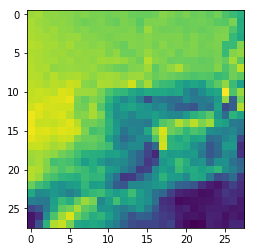

Epoch:  71 3 D


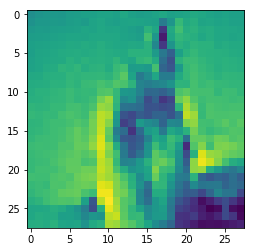

Epoch:  71 8 I


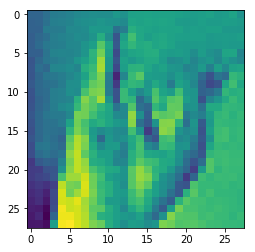

>72, 150/150, d1=0.358, d2=0.305 g=3.018
Epoch:  72 7 H


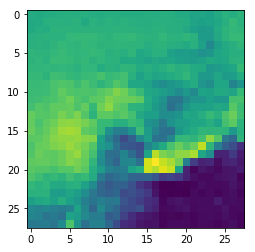

Epoch:  72 2 C


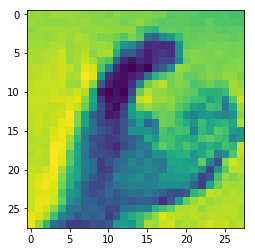

Epoch:  72 5 F


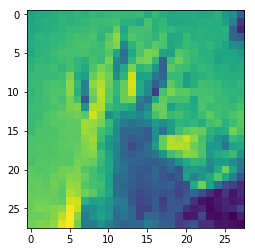

Epoch:  72 0 A


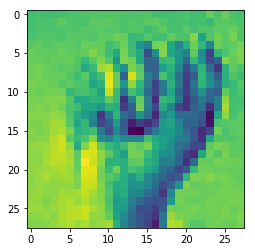

Epoch:  72 7 H


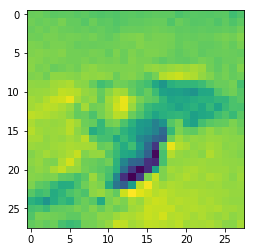

>73, 150/150, d1=0.398, d2=0.287 g=3.133
Epoch:  73 3 D


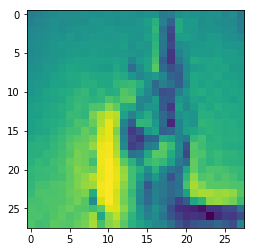

Epoch:  73 0 A


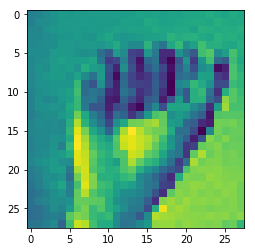

Epoch:  73 4 E


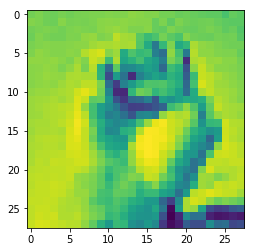

Epoch:  73 4 E


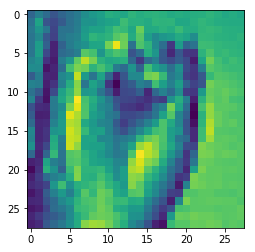

Epoch:  73 7 H


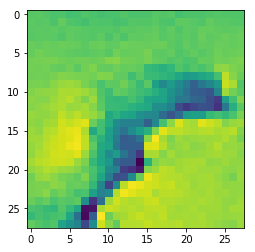

>74, 150/150, d1=0.431, d2=0.306 g=3.040
Epoch:  74 8 I


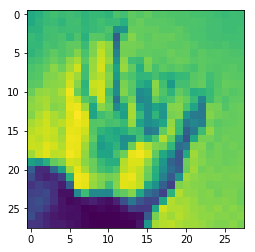

Epoch:  74 9 J


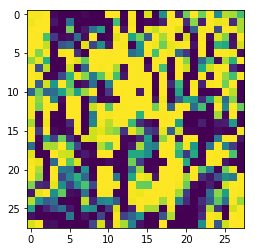

Epoch:  74 6 G


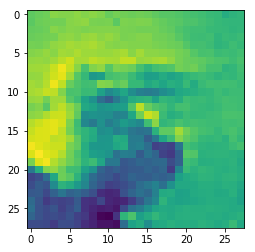

Epoch:  74 2 C


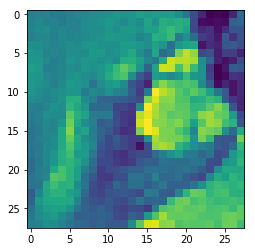

Epoch:  74 4 E


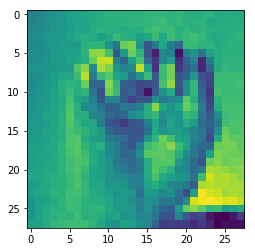

>75, 150/150, d1=0.405, d2=0.267 g=3.033
Epoch:  75 9 J


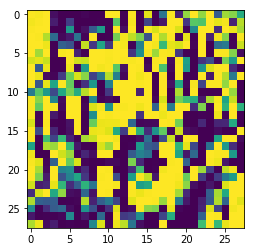

Epoch:  75 1 B


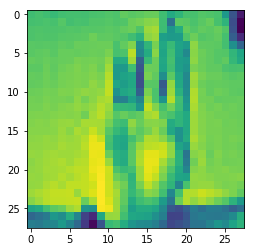

Epoch:  75 8 I


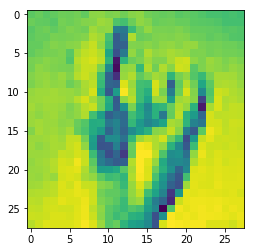

Epoch:  75 3 D


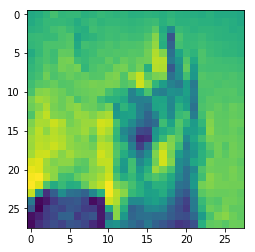

Epoch:  75 6 G


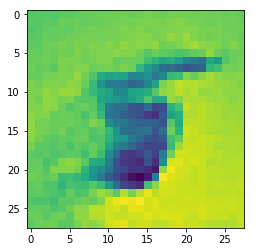

>76, 150/150, d1=0.376, d2=0.317 g=2.859
Epoch:  76 9 J


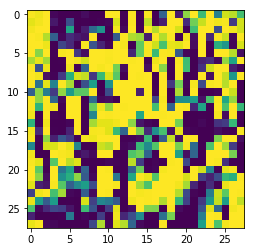

Epoch:  76 8 I


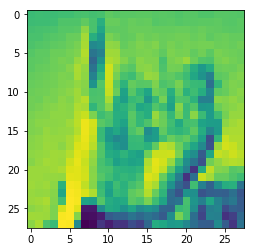

Epoch:  76 4 E


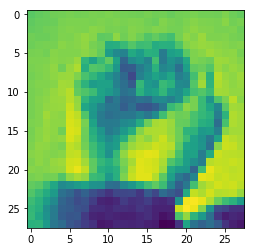

Epoch:  76 5 F


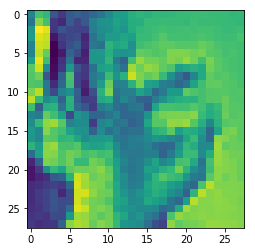

Epoch:  76 9 J


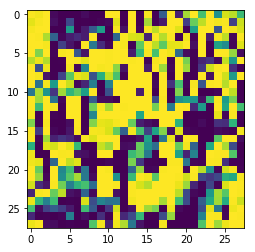

>77, 150/150, d1=0.433, d2=0.260 g=2.304
Epoch:  77 6 G


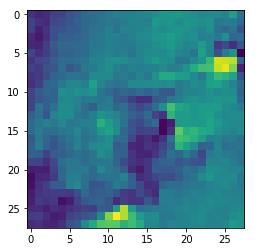

Epoch:  77 0 A


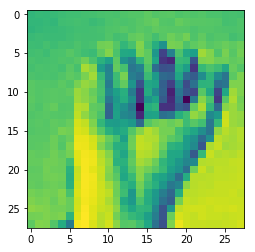

Epoch:  77 0 A


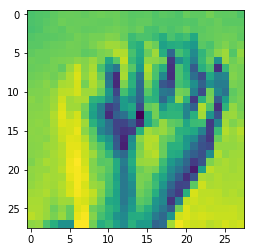

Epoch:  77 9 J


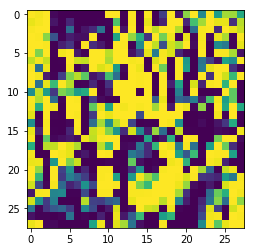

Epoch:  77 1 B


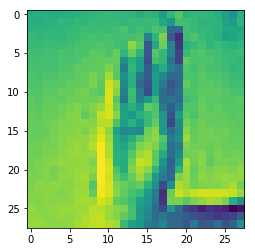

>78, 150/150, d1=0.378, d2=0.315 g=3.106
Epoch:  78 3 D


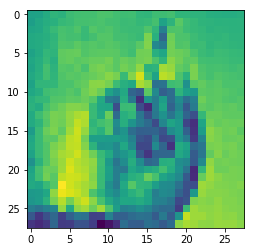

Epoch:  78 3 D


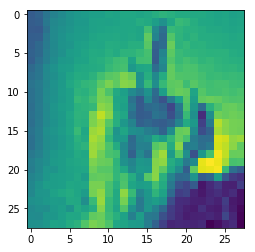

Epoch:  78 7 H


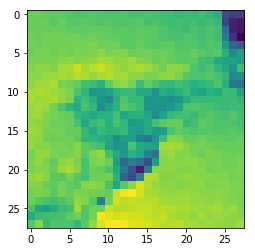

Epoch:  78 3 D


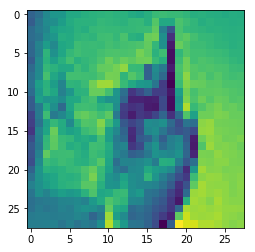

Epoch:  78 5 F


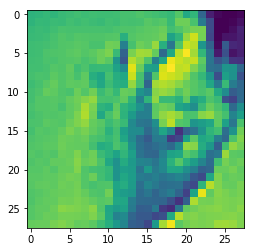

>79, 150/150, d1=0.407, d2=0.257 g=3.332
Epoch:  79 7 H


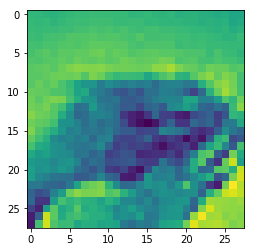

Epoch:  79 4 E


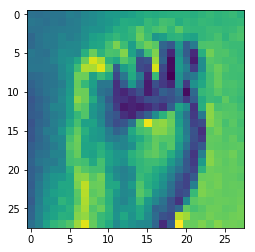

Epoch:  79 3 D


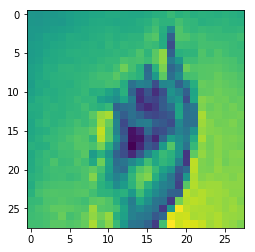

Epoch:  79 8 I


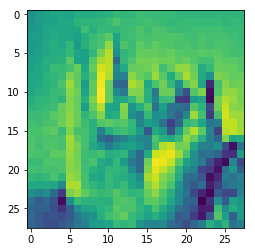

Epoch:  79 8 I


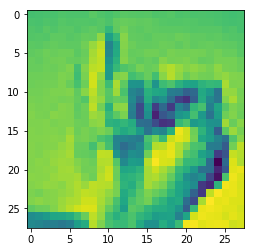

>80, 150/150, d1=0.405, d2=0.267 g=2.865
Epoch:  80 6 G


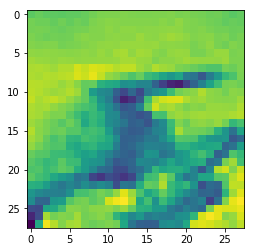

Epoch:  80 0 A


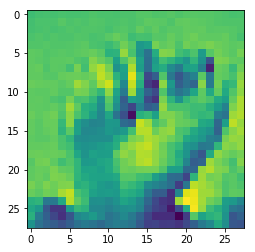

Epoch:  80 2 C


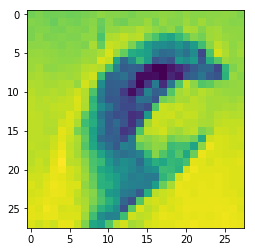

Epoch:  80 7 H


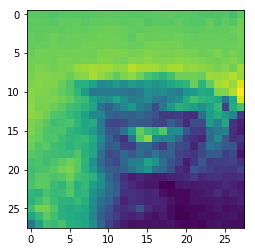

Epoch:  80 4 E


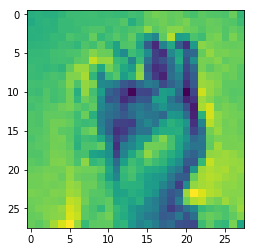

>81, 150/150, d1=0.369, d2=0.325 g=2.462
Epoch:  81 4 E


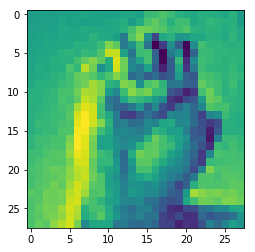

Epoch:  81 6 G


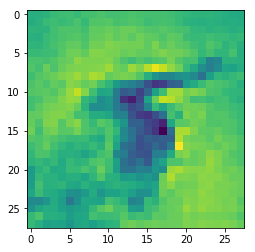

Epoch:  81 7 H


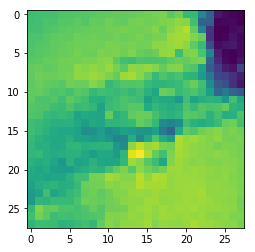

Epoch:  81 5 F


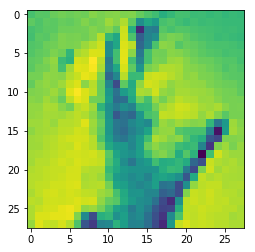

Epoch:  81 9 J


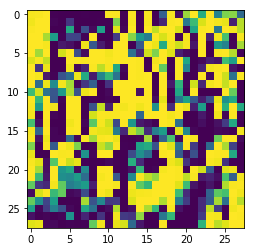

>82, 150/150, d1=0.424, d2=0.288 g=2.711
Epoch:  82 5 F


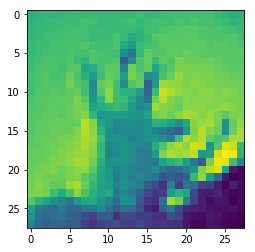

Epoch:  82 1 B


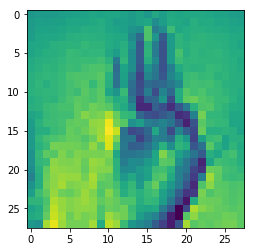

Epoch:  82 9 J


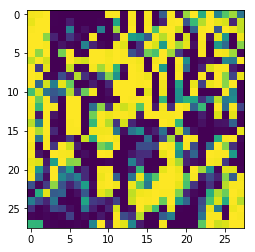

Epoch:  82 5 F


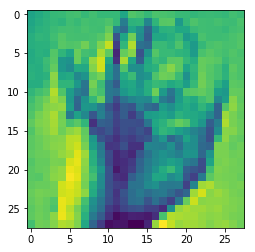

Epoch:  82 4 E


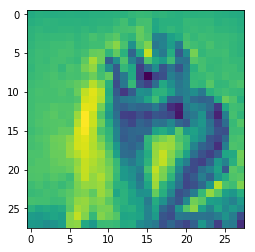

>83, 150/150, d1=0.408, d2=0.267 g=2.466
Epoch:  83 2 C


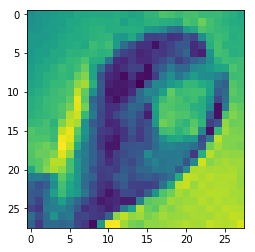

Epoch:  83 5 F


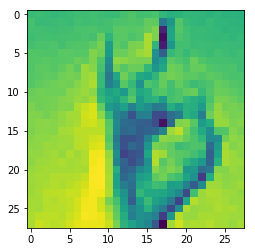

Epoch:  83 6 G


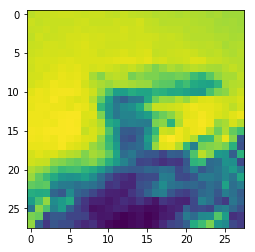

Epoch:  83 7 H


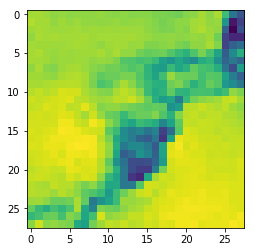

Epoch:  83 0 A


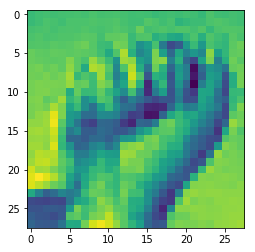

>84, 150/150, d1=0.457, d2=0.292 g=2.412
Epoch:  84 7 H


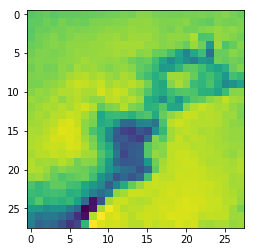

Epoch:  84 0 A


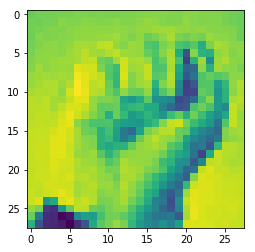

Epoch:  84 6 G


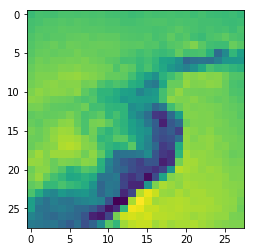

Epoch:  84 3 D


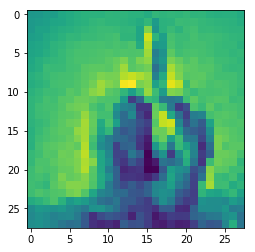

Epoch:  84 4 E


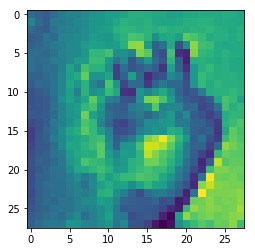

>85, 150/150, d1=0.399, d2=0.252 g=3.348
Epoch:  85 4 E


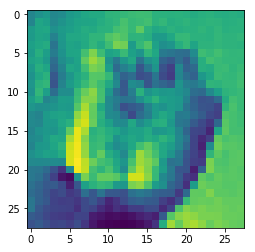

Epoch:  85 8 I


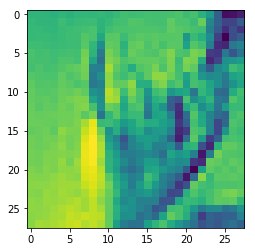

Epoch:  85 8 I


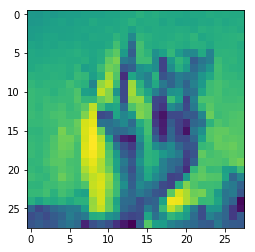

Epoch:  85 5 F


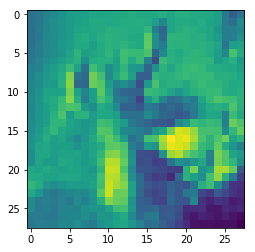

Epoch:  85 0 A


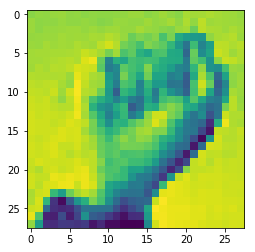

>86, 150/150, d1=0.341, d2=0.311 g=2.210
Epoch:  86 9 J


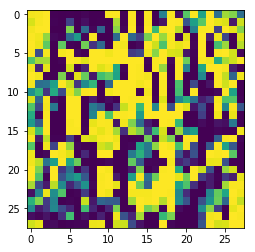

Epoch:  86 0 A


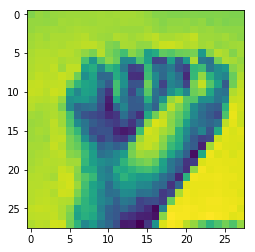

Epoch:  86 1 B


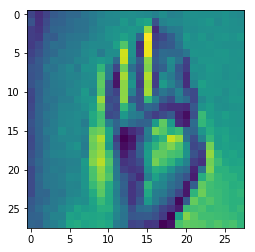

Epoch:  86 5 F


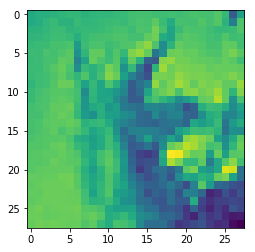

Epoch:  86 1 B


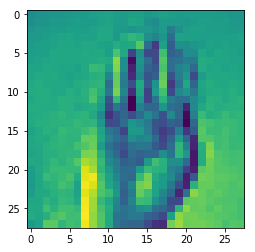

>87, 150/150, d1=0.403, d2=0.292 g=2.913
Epoch:  87 5 F


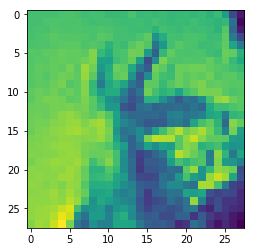

Epoch:  87 4 E


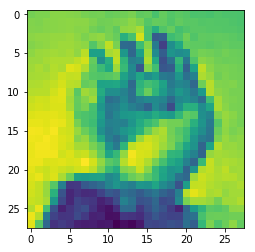

Epoch:  87 4 E


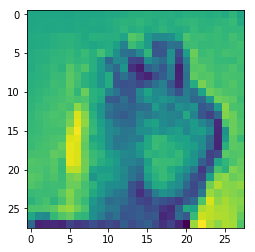

Epoch:  87 2 C


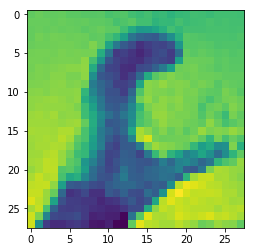

Epoch:  87 9 J


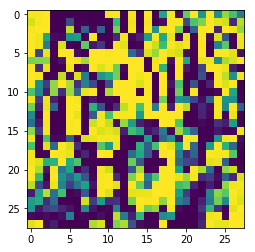

>88, 150/150, d1=0.426, d2=0.319 g=3.027
Epoch:  88 5 F


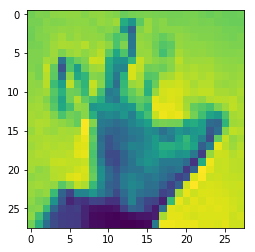

Epoch:  88 3 D


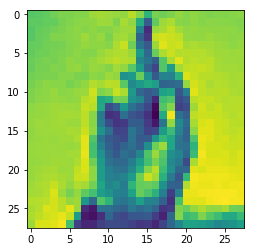

Epoch:  88 7 H


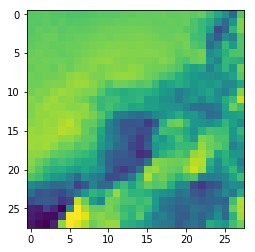

Epoch:  88 2 C


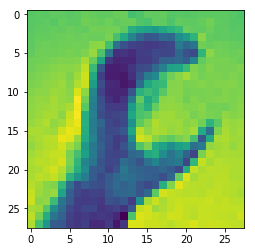

Epoch:  88 3 D


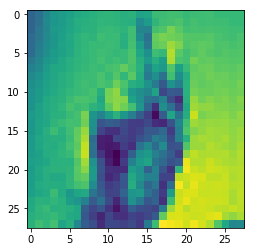

>89, 150/150, d1=0.471, d2=0.266 g=3.028
Epoch:  89 6 G


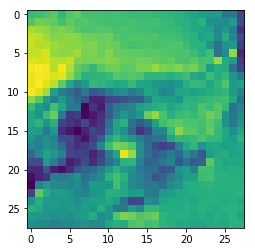

Epoch:  89 2 C


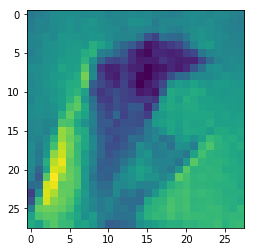

Epoch:  89 5 F


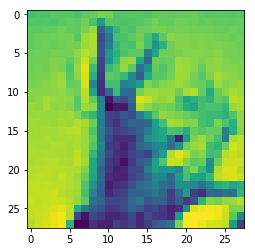

Epoch:  89 1 B


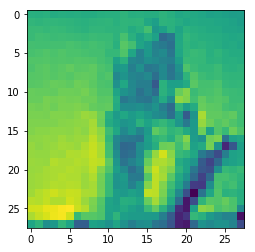

Epoch:  89 6 G


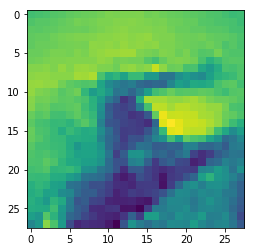

>90, 150/150, d1=0.340, d2=0.267 g=2.845
Epoch:  90 0 A


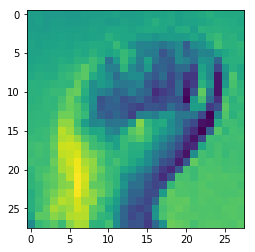

Epoch:  90 7 H


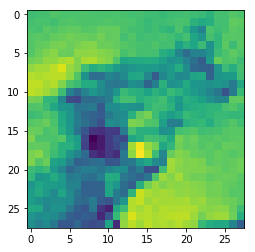

Epoch:  90 0 A


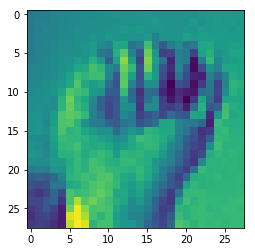

Epoch:  90 0 A


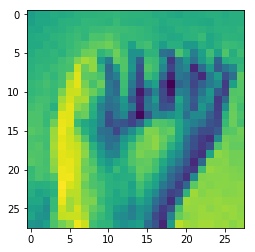

Epoch:  90 2 C


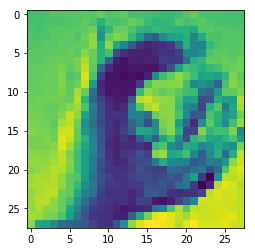

>91, 150/150, d1=0.391, d2=0.286 g=3.390
Epoch:  91 6 G


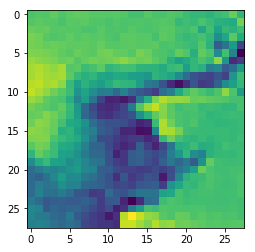

Epoch:  91 3 D


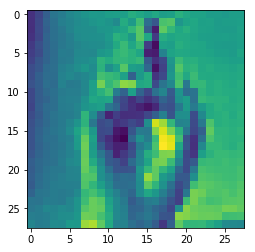

Epoch:  91 8 I


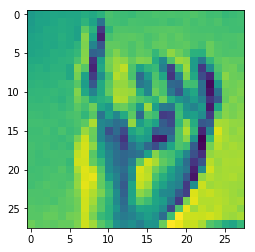

Epoch:  91 5 F


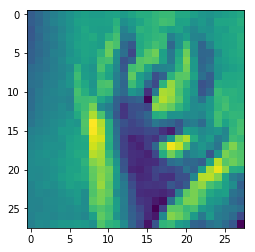

Epoch:  91 3 D


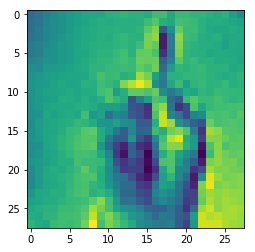

>92, 150/150, d1=0.350, d2=0.264 g=3.128
Epoch:  92 8 I


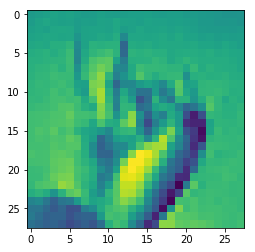

Epoch:  92 5 F


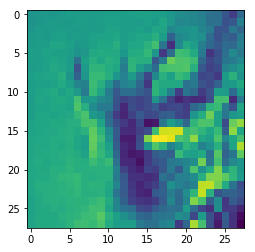

Epoch:  92 2 C


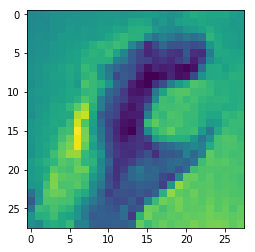

Epoch:  92 9 J


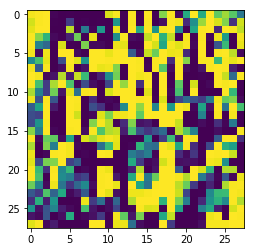

Epoch:  92 7 H


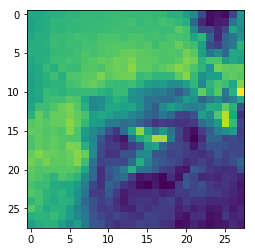

>93, 150/150, d1=0.392, d2=0.293 g=2.766
Epoch:  93 8 I


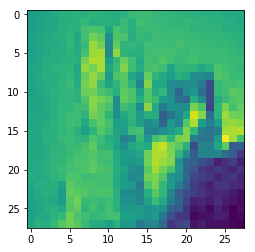

Epoch:  93 3 D


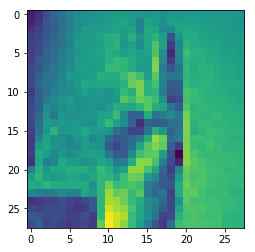

Epoch:  93 4 E


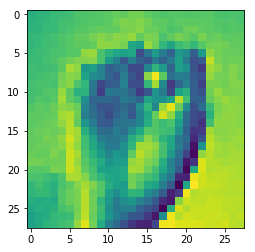

Epoch:  93 6 G


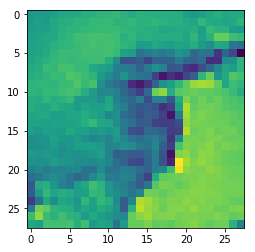

Epoch:  93 6 G


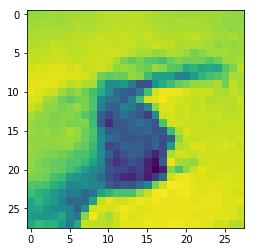

>94, 150/150, d1=0.431, d2=0.263 g=2.979
Epoch:  94 5 F


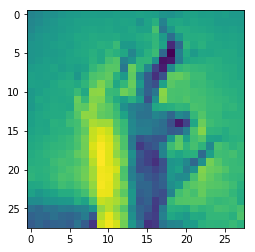

Epoch:  94 6 G


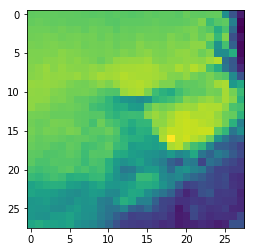

Epoch:  94 4 E


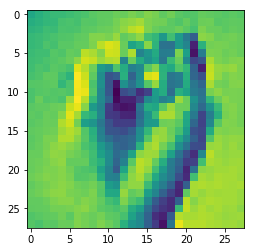

Epoch:  94 3 D


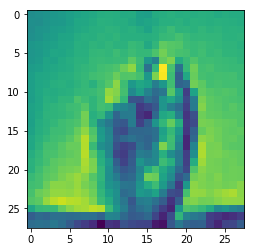

Epoch:  94 0 A


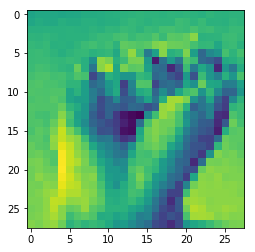

>95, 150/150, d1=0.332, d2=0.270 g=2.949
Epoch:  95 2 C


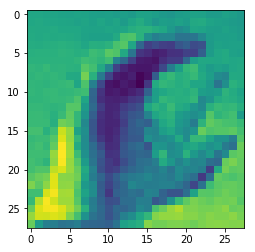

Epoch:  95 5 F


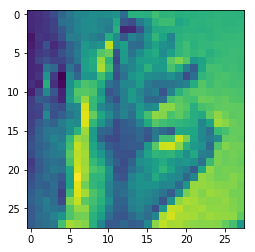

Epoch:  95 7 H


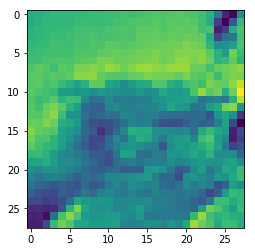

Epoch:  95 9 J


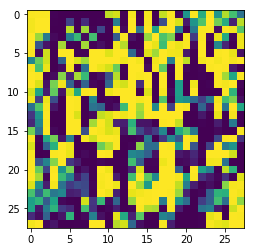

Epoch:  95 0 A


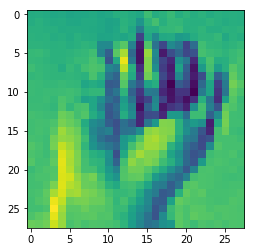

>96, 150/150, d1=0.461, d2=0.288 g=3.198
Epoch:  96 5 F


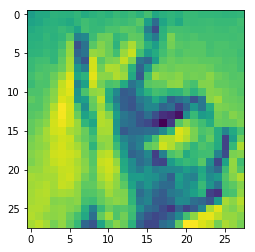

Epoch:  96 7 H


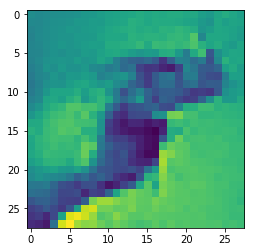

Epoch:  96 9 J


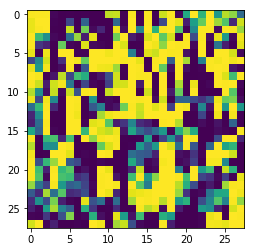

Epoch:  96 2 C


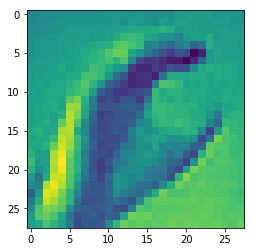

Epoch:  96 2 C


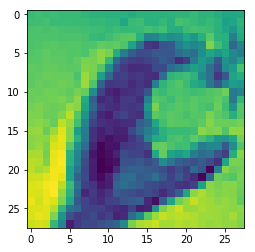

>97, 150/150, d1=0.333, d2=0.277 g=3.231
Epoch:  97 5 F


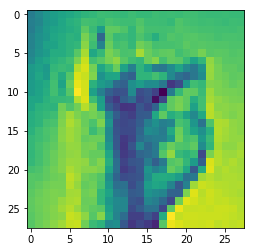

Epoch:  97 7 H


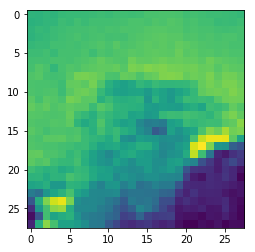

Epoch:  97 5 F


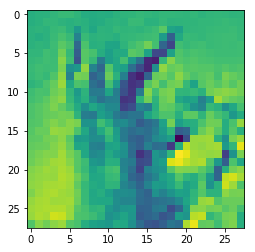

Epoch:  97 0 A


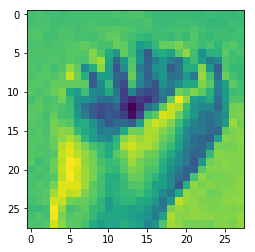

Epoch:  97 3 D


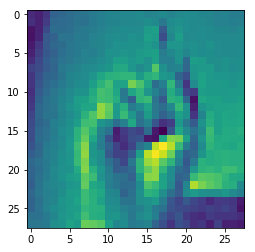

>98, 150/150, d1=0.331, d2=0.248 g=2.958
Epoch:  98 4 E


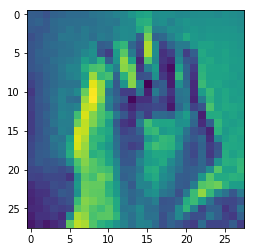

Epoch:  98 0 A


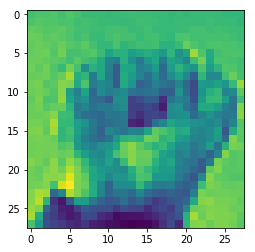

Epoch:  98 9 J


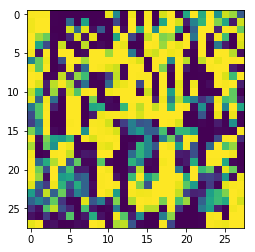

Epoch:  98 0 A


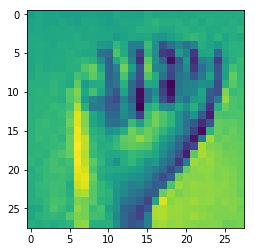

Epoch:  98 2 C


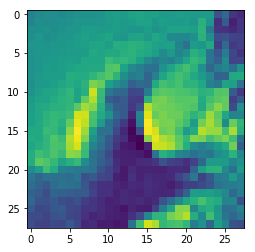

>99, 150/150, d1=0.327, d2=0.239 g=3.377
Epoch:  99 9 J


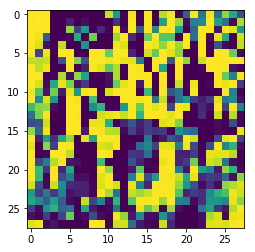

Epoch:  99 0 A


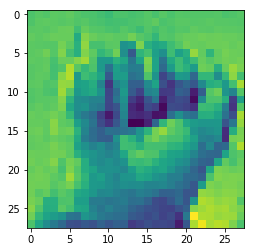

Epoch:  99 0 A


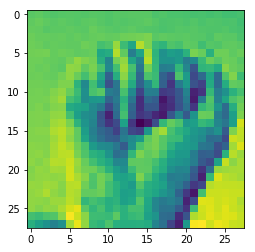

Epoch:  99 7 H


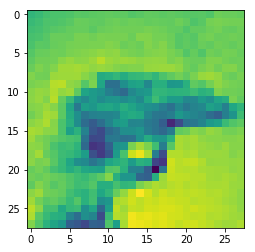

Epoch:  99 0 A


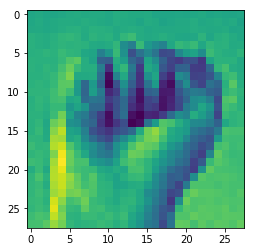

>100, 150/150, d1=0.413, d2=0.318 g=2.738


In [29]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=20, n_batch=128):
    
    def view_generated_images(g_model, epoch_num):
    
        [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, 5)
        
        #print("Epoch: ", epoch_num)

        for i in range(len(X_fake)):
            print("Epoch: ", epoch_num, labels[i], string.ascii_uppercase[labels[i]])
            plt.imshow(X_fake[i].reshape(28,28))
            plt.show()
        return
    
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
      view_generated_images(g_model, i)
      # enumerate batches over the training set
      
      for j in range(bat_per_epo):
        # get randomly selected 'real' samples
        [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
        # update discriminator model weights
        d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
        # generate 'fake' examples
        [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator model weights
        d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
        # prepare points in latent space as input for the generator
        [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
      # save the generator model
      g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator(n_classes = 24 )
# create the generator
g_model = define_generator(latent_dim, n_classes =24)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100)

In [30]:
from matplotlib.pyplot import rcParams

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.


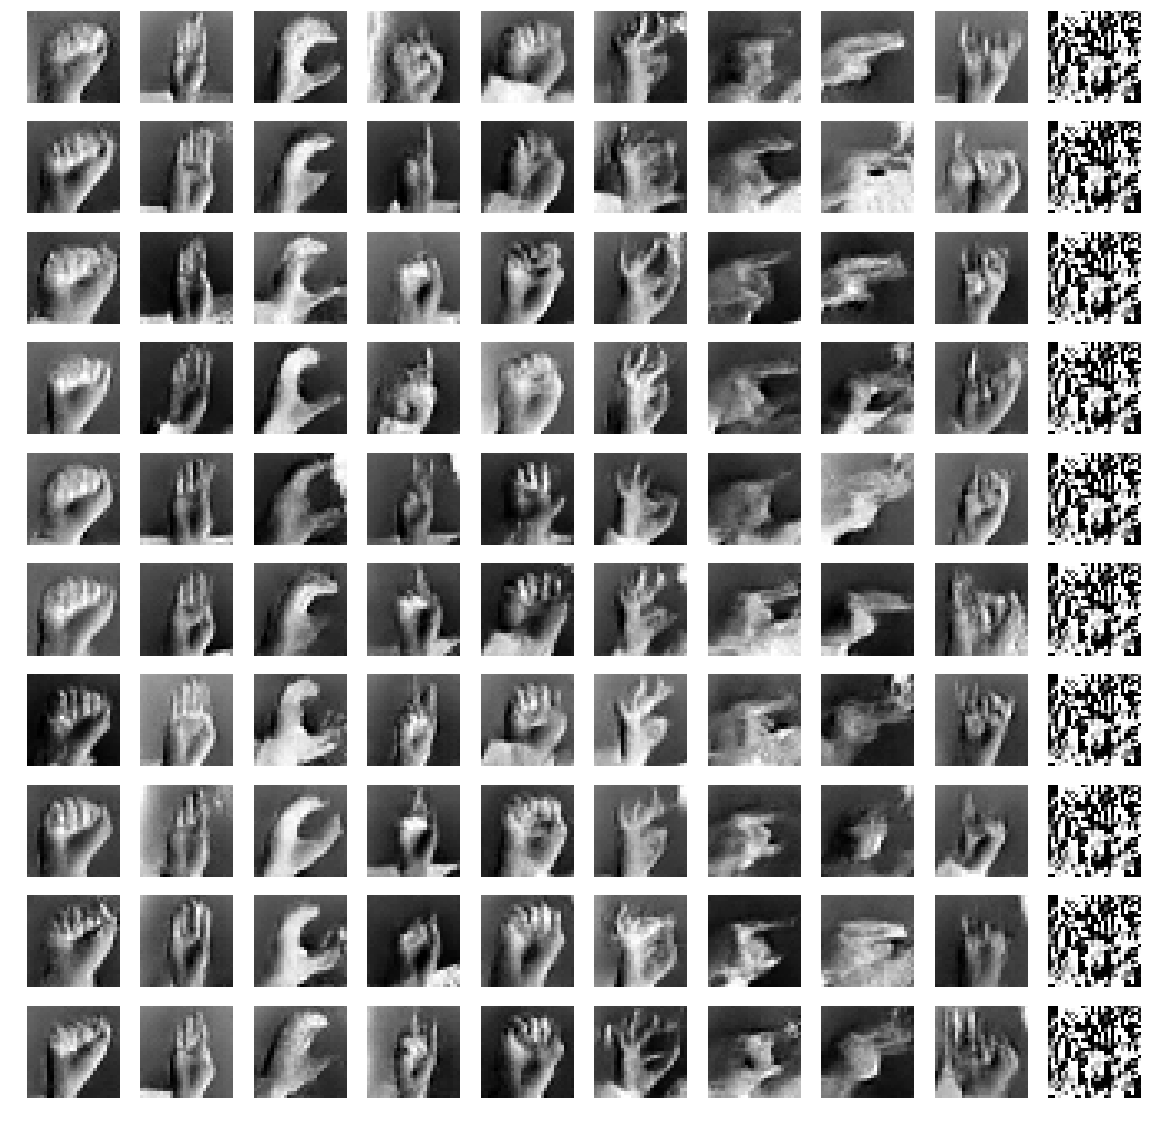

In [32]:
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot
# load model
model = load_model('cgan_generator.h5')

def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]
 
# create and save a plot of generated images
def save_plot(examples, n):
    rcParams['figure.figsize'] = 20, 20
    # plot images
    for i in range(n * 10):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()
 
# generate images
latent_points, labels = generate_latent_points(100, 100)
# specify labels
labels = asarray([x for _ in range(10) for x in range(10)])

# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)

In [33]:
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.


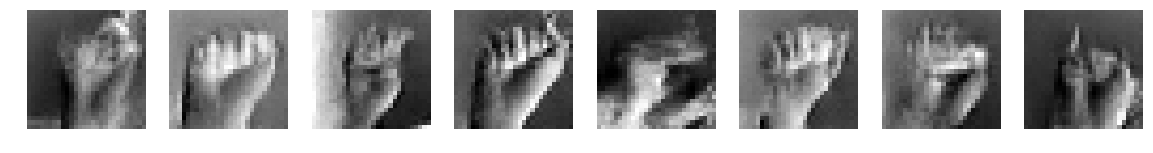

In [34]:
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot
# load model
model = load_model('cgan_generator.h5')

def generate_latent_points_from_input(latent_dim, input_string):
    input_string = str(input_string).upper()

    labels = np.array([string.ascii_uppercase.index(x) for x in input_string])
    # generate points in the latent space
    x_input = randn(latent_dim * len(labels))
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(len(labels), latent_dim)
    # generate labels
    #labels = randint(0, n_classes, n_samples)
    return [z_input, labels]

# create and save a plot of generated images
def show_sequence(outputs, n):
    rcParams['figure.figsize'] = 10, 10
    # plot images
    for i in range(n):
        # define subplot
        pyplot.subplot(1, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(outputs[i, :, :, 0], cmap='gray_r')
    pyplot.show()

# generate images
latent_points, labels = generate_latent_points_from_input(100, "narahari")
# specify labels
#labels = asarray([x for _ in range(10) for x in range(24)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
show_sequence(X, len(X))

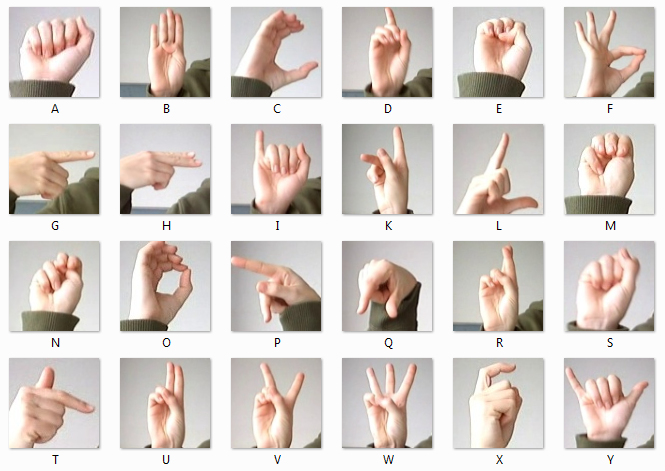

In [36]:
from IPython.display import Image
Image("../input/amer_sign2.png")

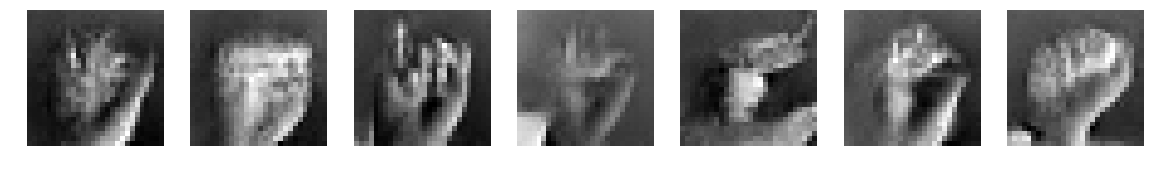

In [38]:
latent_points, labels = generate_latent_points_from_input(100, "Krishna")
# specify labels
#labels = asarray([x for _ in range(10) for x in range(24)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
show_sequence(X, len(X))

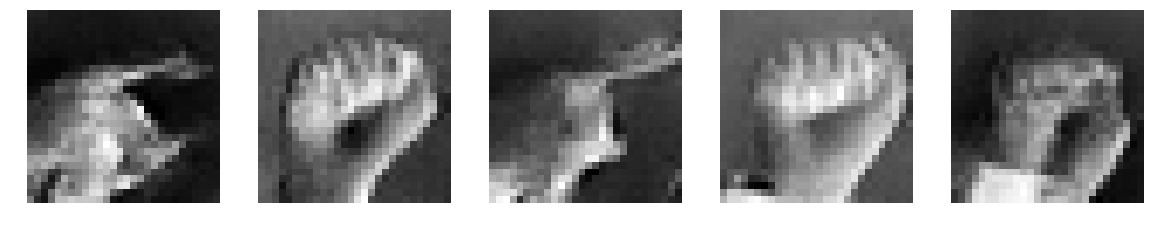

In [35]:
latent_points, labels = generate_latent_points_from_input(100, "gagan")
# specify labels
#labels = asarray([x for _ in range(10) for x in range(24)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
show_sequence(X, len(X))